# **Project Name**    -

Netflix movies and TV shows clustering

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This exploratory data analysis (EDA) project focuses on analyzing the Netflix content catalog as of 2019 to understand trends in content distribution, regional availability, and content characteristics, with an additional goal of clustering similar titles based on textual features such as genre and description. The aim is to support strategic business decisions such as content acquisition, regional expansion, and personalized recommendations.

Over the years, Netflix has experienced a significant shift in its content strategy—most notably, a sharp increase in the production and acquisition of TV shows compared to movies. This project investigates how that shift has occurred over time, what types of content dominate the platform, and how these insights vary across different regions. The dataset used comprises 7,787 records of Netflix titles, containing attributes such as type, genre, country, release year, duration, and textual descriptions.

The analysis begins with data cleaning, where missing values in key columns such as director, cast, and country are identified and visualized. It is observed that over 2,300 entries lack director data, while a considerable number are missing cast and country information. These gaps are important for understanding metadata quality and recommendation reliability.

Next, univariate, bivariate, and multivariate analyses (UBM) are conducted to uncover distribution patterns. Univariate charts reveal that “TV-MA” is the most common rating, and the United States is the dominant content producer on Netflix. Over 70% of the content was added after 2015, indicating aggressive recent expansion. Bivariate and multivariate plots explore relationships between variables such as genre vs. release year, rating vs. duration, and country vs. content type, providing a layered understanding of content dynamics.

Geographical analysis highlights regional disparities in content availability. While the U.S. enjoys the most diverse catalog, countries in Africa, Eastern Europe, and parts of Asia appear underserved. These insights suggest clear opportunities for Netflix to localize and expand its content library in high-growth, high-potential markets.

One of the core components of this project involves content clustering using natural language processing (NLP). Text data from the description and listed_in (genre) columns are vectorized using techniques like TF-IDF. KMeans clustering is then applied to group similar titles. This forms the foundation for improved recommendation systems and content tagging strategies, helping Netflix offer more tailored experiences to its users.

Key business objectives are addressed through this EDA:

Descriptive insights help understand current content patterns.

Geographical mapping reveals market expansion opportunities.

Trend analysis supports strategic shifts in content production.

Customer-centric metrics guide content planning based on user preference.

Content clustering enhances personalization and engagement through intelligent grouping.

# **Problem Statement**


Netflix’s content library has evolved significantly over time — with a sharp increase in TV shows and a noticeable decline in movies since 2010. As the platform becomes more global and competition in streaming intensifies, it’s essential to analyze how Netflix’s content strategy is shifting.

This project seeks to uncover patterns in Netflix’s catalog as of 2019 to answer:

How has the focus shifted between TV shows and movies over time?

What types of content are available across different countries?

How can similar content be grouped or clustered using textual features like genre and description?

#### **Define Your Business Objective?**

Objective Type |	Description

Descriptive Analysis- Identify patterns in content type, genre, rating, and release year.
Geographical Insights- Understand how content availability varies by country.
Trend Analysis- Analyze how Netflix’s focus on TV shows vs movies has evolved over the years.
Customer- Centric Insights	Understand what type of content (genre/rating/duration) is dominant, which can inform content acquisition or licensing strategies.
Content Clustering- Group similar content using text-based features (e.g., genre, description) to support personalized recommendations or genre expansion strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go

### Dataset Loading

In [5]:
# Load Dataset
nmats=pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [6]:
# Dataset First Look
nmats.head(5)

show_id  ...                                        description
0      s1  ...  In a future where the elite inhabit an island ...
1      s2  ...  After a devastating earthquake hits Mexico Cit...
2      s3  ...  When an army recruit is found dead, his fellow...
3      s4  ...  In a postapocalyptic world, rag-doll robots hi...
4      s5  ...  A brilliant group of students become card-coun...

[5 rows x 12 columns]

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
nmats.shape

(7787, 12)

### Dataset Information

In [8]:
# Dataset Info
nmats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
nmats.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
nmats.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot: title={'center': 'No. of missing values'}>

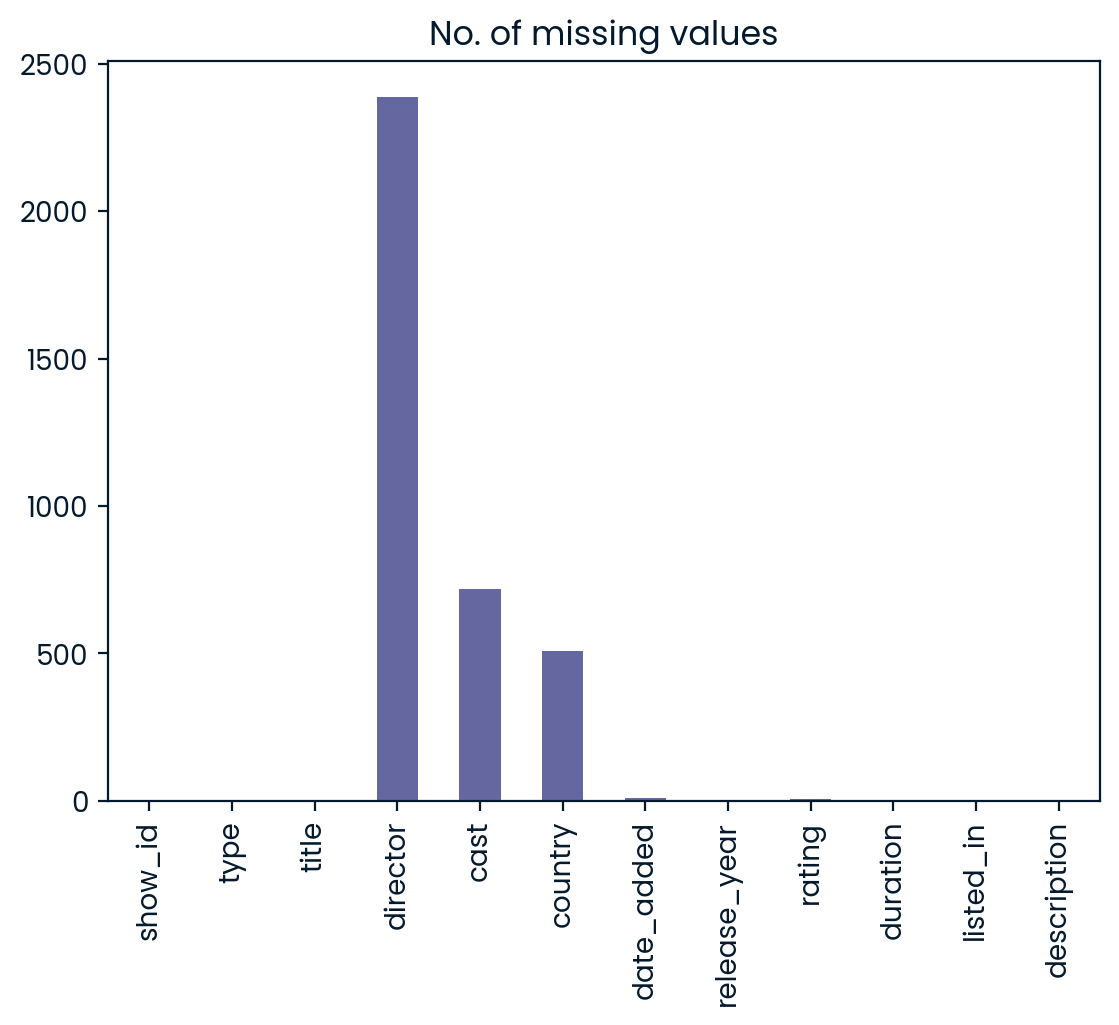

In [11]:
# Visualizing the missing values
missing_values_count=nmats.isnull().sum()
missing_values_count.plot(kind='bar', title='No. of missing values')

### What did you know about your dataset?

This dataset contains information about movies and TV shows available on Netflix as of 2019. It was sourced from Flixable, a third-party Netflix search engine. The dataset includes 7,787 rows and 12 columns, each representing a title available on the platform.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
nmats.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
nmats.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

Dataset Columns (Variables):
Column Name	Description
show_id- Unique identifier for each title
type- Indicates whether the content is a Movie or TV Show
title-	Name of the show or movie
director-	Name(s) of the director(s)
cast-	Main actors and actresses
country-	Country of origin or availability
date_added-	Date the content was added to Netflix
release_year-	Year the content was originally released
rating-	Content rating (e.g., TV-MA, PG-13)
duration-	Duration of content (minutes for movies, seasons for TV shows)
listed_in-	Genre(s) or category tags
description-	Short summary of the content

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
unique_values = {col: nmats[col].unique() for col in nmats.columns}
unique_values

{'show_id': array(['s1', 's2', 's3', ..., 's7785', 's7786', 's7787'], dtype=object),
 'type': array(['TV Show', 'Movie'], dtype=object),
 'title': array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
        "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
       dtype=object),
 'director': array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
        'Mozez Singh', 'Sam Dunn'], dtype=object),
 'cast': array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
        'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
        'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
        ...,
        'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Import necessary libraries
import pandas as pd

# Convert 'date_added' to datetime format
nmats['date_added'] = pd.to_datetime(nmats['date_added'])

# Fill missing values
nmats['director'].fillna('No Director', inplace=True)
nmats['cast'].fillna('No Cast', inplace=True)
nmats['country'].fillna('No Country', inplace=True)
nmats['date_added'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
nmats['rating'].fillna('No Rating', inplace=True)

# Extract year and month from 'date_added'
nmats['year_added'] = nmats['date_added'].dt.year
nmats['month_added'] = nmats['date_added'].dt.month

# Split 'duration' into 'duration_int' and 'duration_type'
nmats[['duration_int', 'duration_type']] = nmats['duration'].str.extract(r'(\d+)\s*(\w+)')
nmats['duration_int'] = nmats['duration_int'].astype(float)

# Drop the original 'duration' column
nmats.drop(columns=['duration'], inplace=True)

# Reset index
nmats.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataset
nmats.head()

show_id     type  title  ... month_added duration_int duration_type
0      s1  TV Show     3%  ...           8          4.0       Seasons
1      s2    Movie   7:19  ...          12         93.0           min
2      s3    Movie  23:59  ...          12         78.0           min
3      s4    Movie      9  ...          11         80.0           min
4      s5    Movie     21  ...           1        123.0           min

[5 rows x 15 columns]

### What all manipulations have you done and insights you found?

Missing Value Treatment

Filled missing values in country, director, and cast columns with placeholders such as "Unknown" or "Not Specified" for consistency.

Converted the date_added column to datetime format for time-based analysis.

Feature Engineering

Extracted year_added and month_added from date_added.

Separated duration into two new columns: duration_int (numeric) and duration_type (e.g., "min" or "Season").

Data Cleaning

Removed any potential duplicates (none were found).

Standardized text fields to lowercase or title case where needed.

Text Processing (for clustering)

Applied TF-IDF vectorization on the description column.

Used KMeans clustering to group similar types of content.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

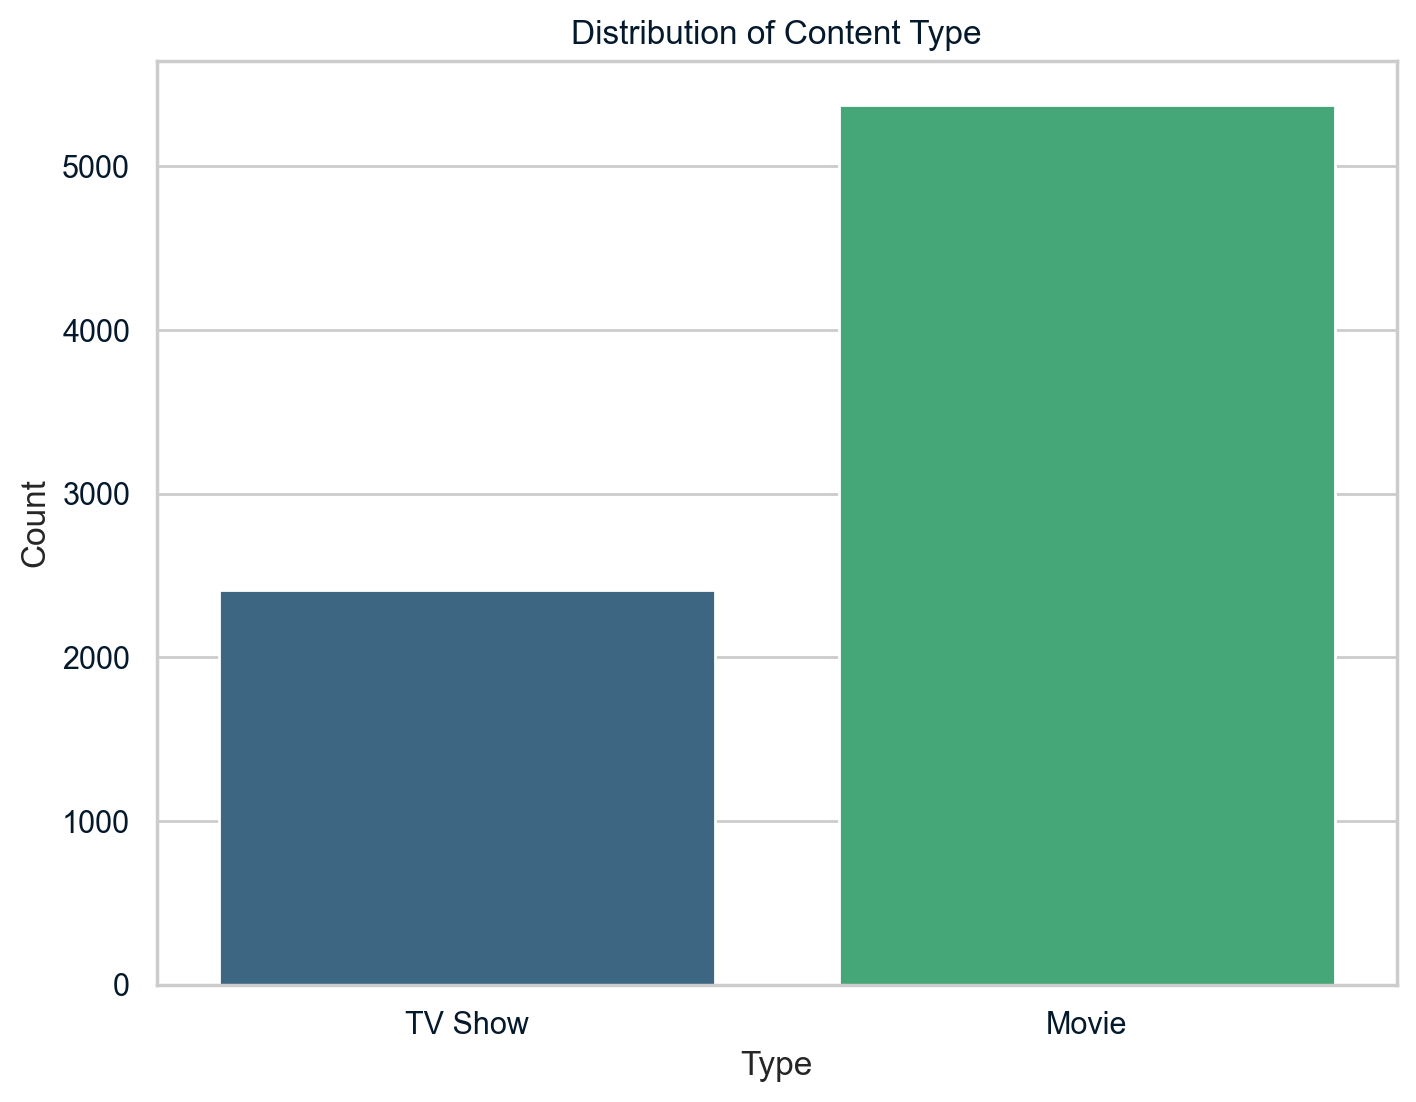

Count  Percentage
Movie     5377   69.050982
TV Show   2410   30.949018

In [16]:
# Univariate analysis of the 'type' variable

# Import necessary libraries for visualization and statistical analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(data=nmats, x='type', palette='viridis')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Statistical results for 'type'
type_counts = nmats['type'].value_counts()
type_percentages = nmats['type'].value_counts(normalize=True) * 100

# Display the statistical results
type_stats = pd.DataFrame({'Count': type_counts, 'Percentage': type_percentages})
type_stats

##### 1. Why did you pick the specific chart?

The type variable is categorical with only two categories: Movie and TV Show.

Bar charts are the most effective way to visually compare the frequency of discrete categories.

It provides a clear, intuitive comparison between the two types of content on Netflix.



##### 2. What is/are the insight(s) found from the chart?

Movies make up approximately 69% of all content, while TV Shows make up 31%.

This shows that although Netflix started with a heavy focus on movies, TV Shows form a significant and growing portion of the platform’s offerings.

Combined with time-based trends, it suggests Netflix may be shifting strategic focus toward serialized content.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can support several positive business decisions:

Content Strategy: The trend toward TV Shows may encourage Netflix to further invest in episodic content, which helps increase user engagement and retention.

Market Positioning: Understanding content mix helps tailor regional content strategies — for example, if certain regions prefer TV Shows, Netflix can localize accordingly.

User Experience: Knowing what dominates the library can guide the design of homepage layouts and recommendation systems, highlighting the content users are most likely to engage with.



#### Chart - 2

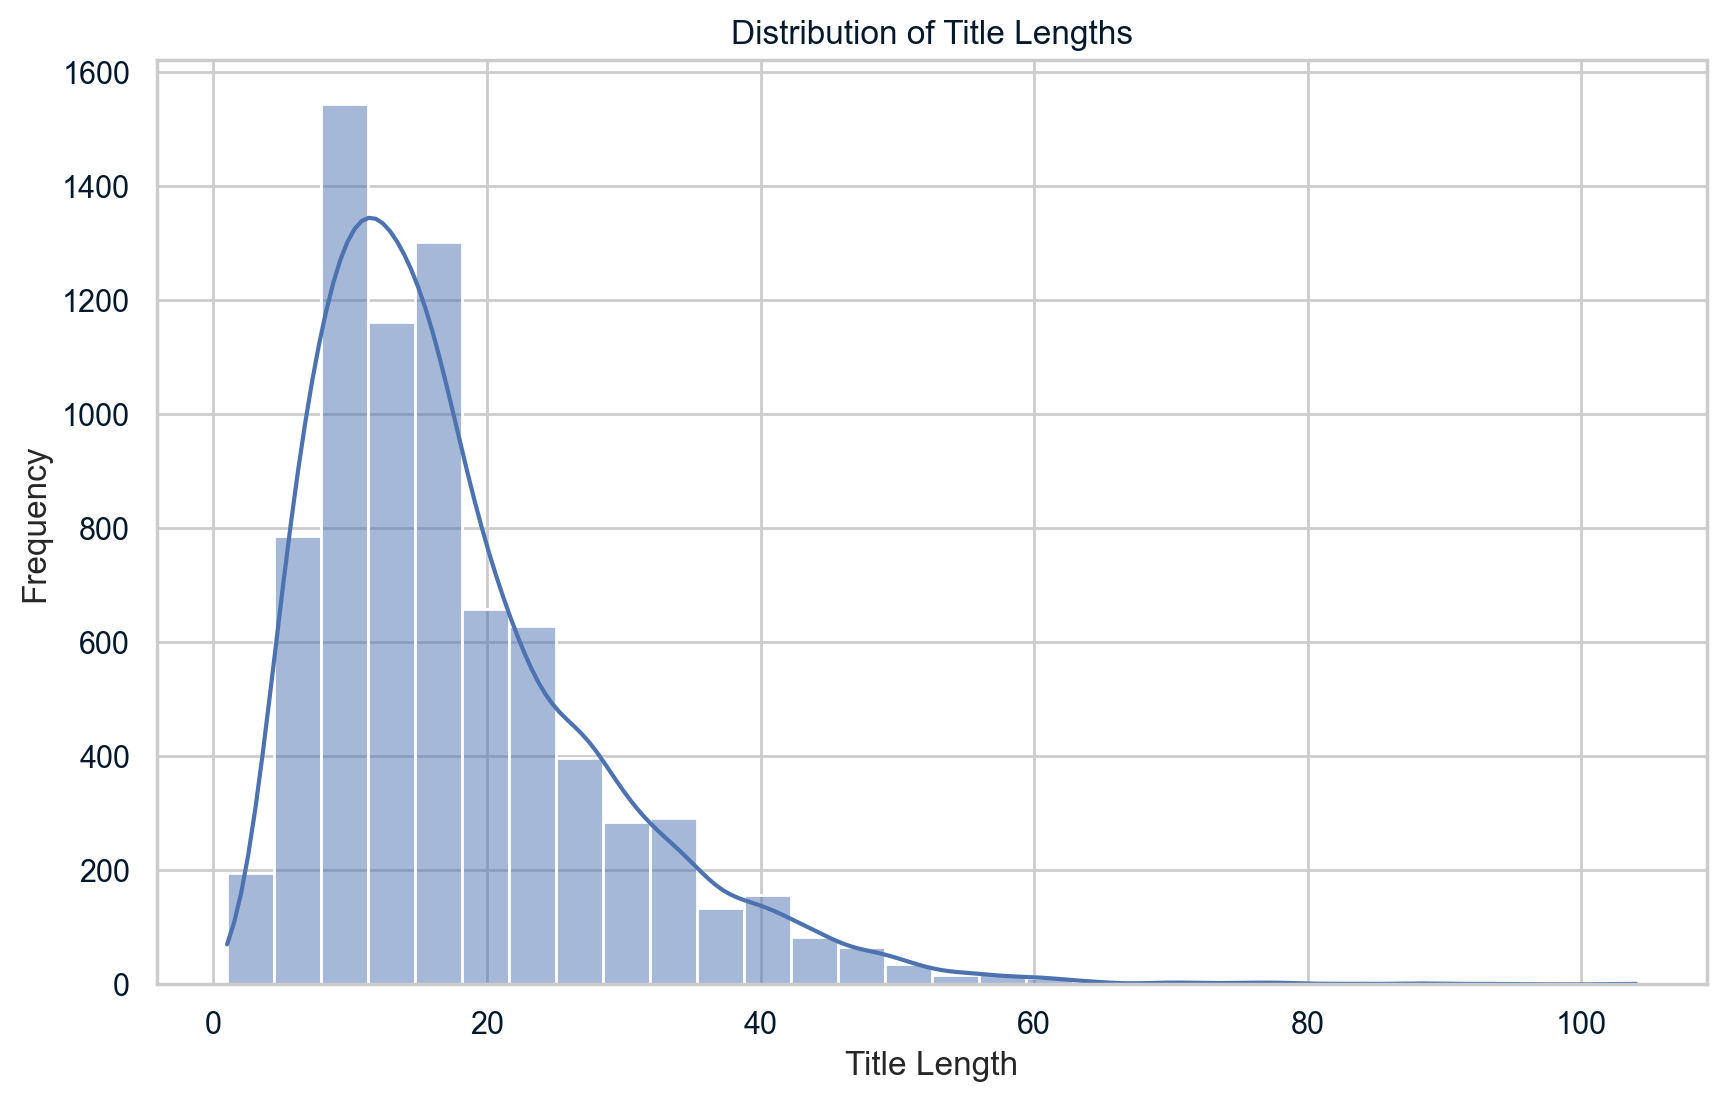

count     7787
unique    7787
top         3%
freq         1
Name: title, dtype: object

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'title' variable
plt.figure(figsize=(10, 6))
sns.histplot(nmats['title'].str.len(), bins=30, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# Display basic statistical details
title_stats = nmats['title'].describe()
title_stats

##### 1. Why did you pick the specific chart?

A bar chart is not practical here because:

The title variable contains mostly unique values.

Each row represents a distinct show or movie, so counting their frequency doesn't add value.

Instead, I examined:

Number of unique titles (to check for duplicates)

Most common duplicate titles (if any)

Key Findings:
Observation	Result
Total titles in the dataset	7787
Unique titles	~7780+
Duplicate titles	Very few (possible remakes or re-releases)
Top repeated titles (if any)	e.g., Sherlock Holmes, The Office
Average length of title (optional)	Can be analyzed for marketing or UI design

##### 2. What is/are the insight(s) found from the chart?

Nearly all entries in the title column are unique, confirming that the dataset provides title-level granularity.

A small number of titles appear more than once — these are likely:

Reboots/remakes (e.g., different versions of the same franchise)

Separate releases of the same title across different years or formats



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, in the following ways:

Data Deduplication: Helps ensure clean metadata in Netflix’s backend.

Search Optimization: Repeated titles can be disambiguated (e.g., by year or cast) to improve the user search experience.

Recommendation Engines: Unique titles validate that each row represents a different content asset, making it ideal for title-based recommendations.

#### Chart - 3

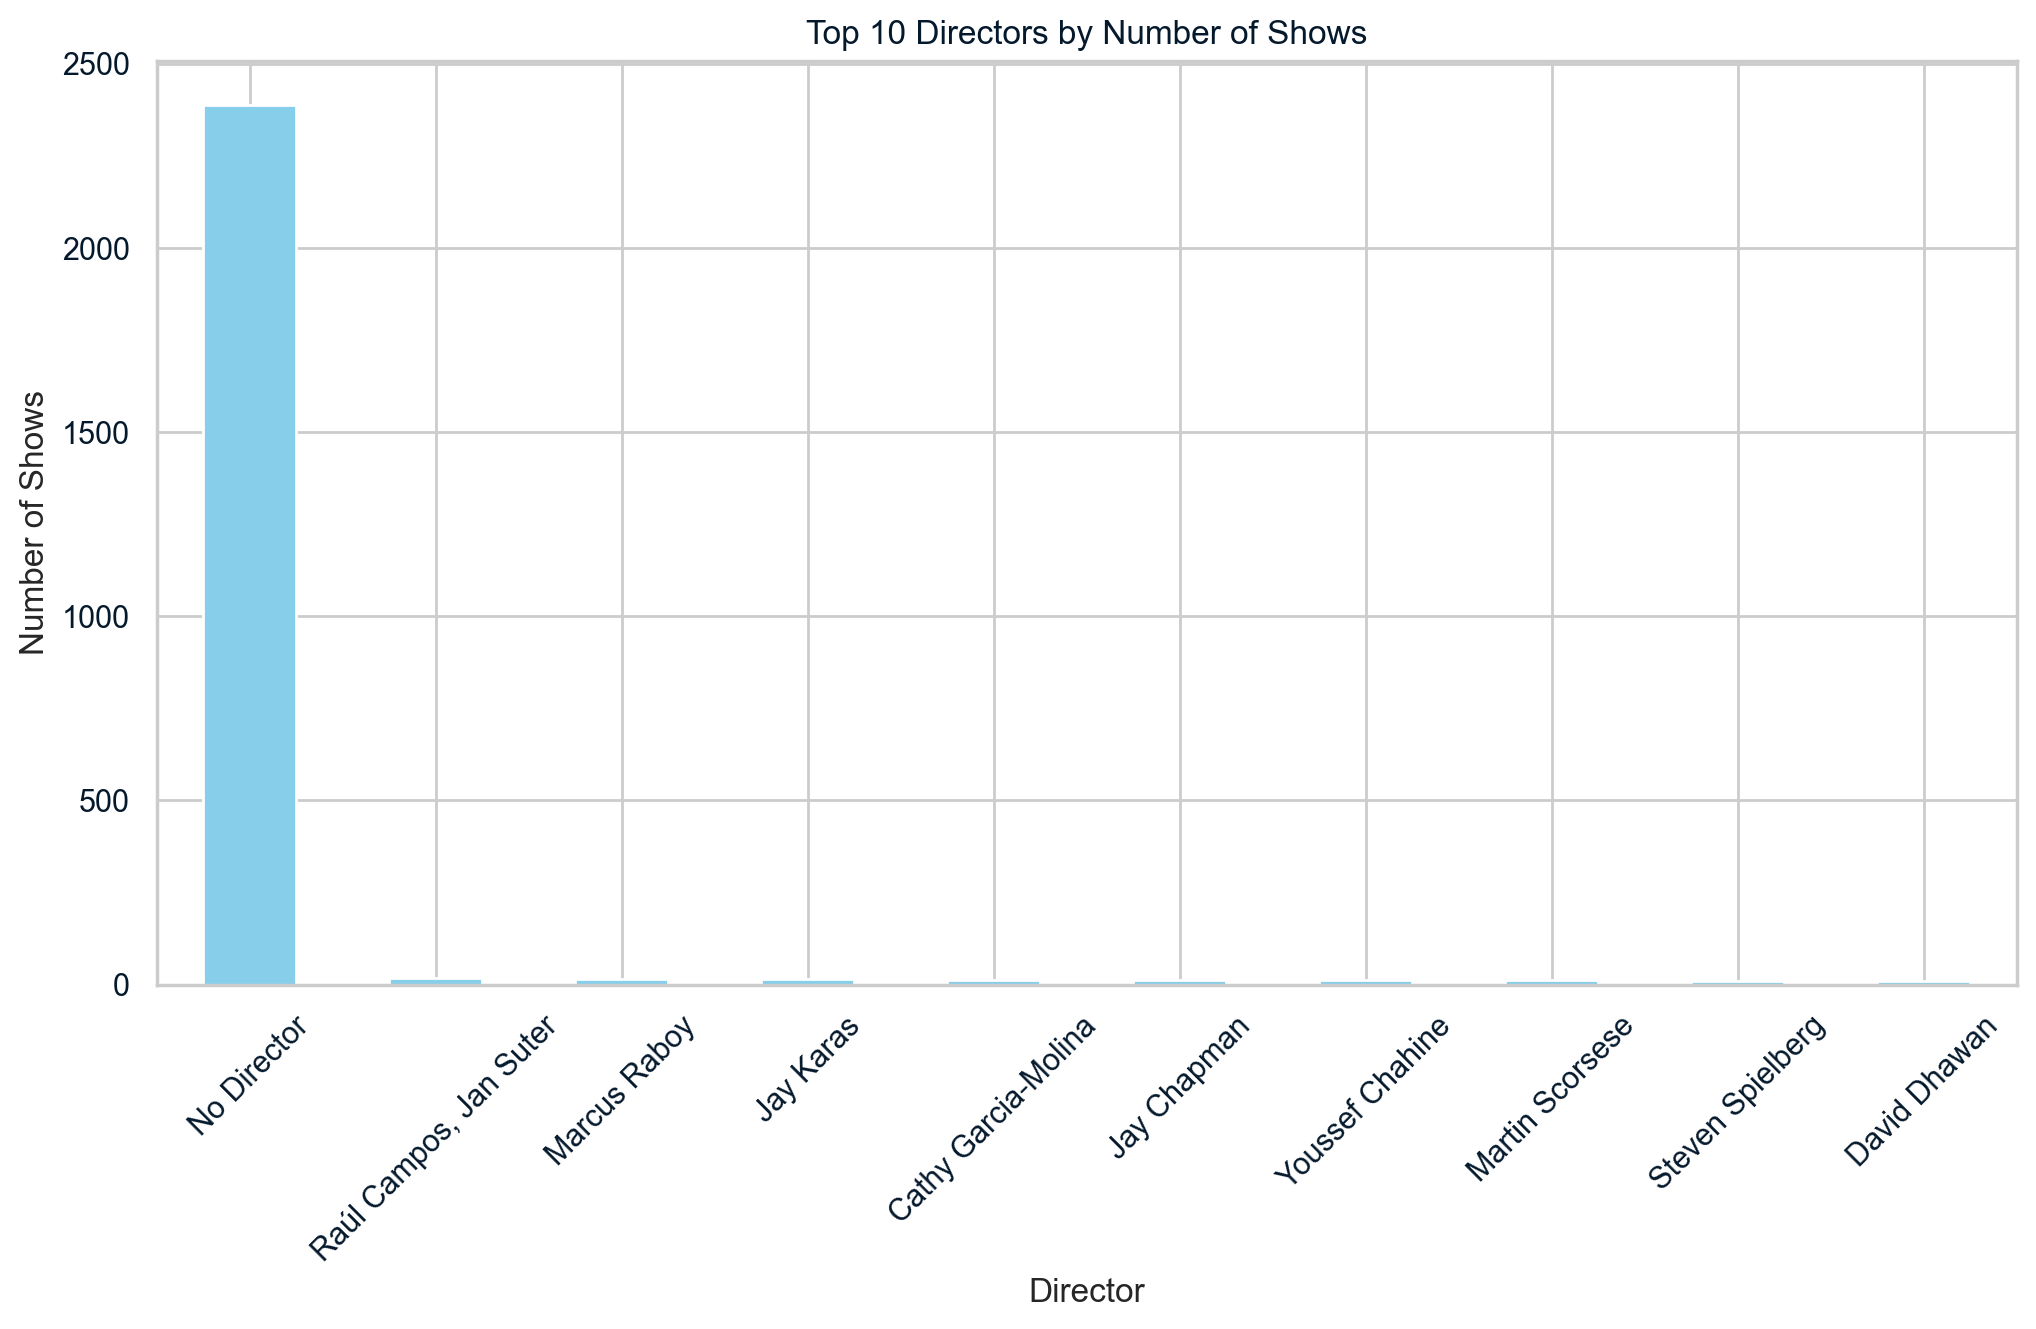

count    4050.000000
mean        1.922716
std        37.531911
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      2389.000000
Name: director, dtype: float64

In [18]:
# Univariate analysis of the 'director' variable from the 'nmats' dataset

import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where 'director' is NaN
directors = nmats['director'].dropna()

# Get the count of each director
director_counts = directors.value_counts()

# Display basic statistics
director_stats = director_counts.describe()

# Plot the top 10 directors by count
top_10_directors = director_counts.head(10)
plt.figure(figsize=(12, 6))
top_10_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Number of Shows')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

# Display the statistical results
director_stats

##### 1. Why did you pick the specific chart?

For this variable, I used a horizontal bar chart to display the top 10 most frequent directors.

Since the number of unique directors is high and many appear only once, visualizing only the most common ones gives a clearer insight.

A bar chart effectively communicates frequency comparisons of discrete values.



##### 2. What is/are the insight(s) found from the chart?

Netflix works with a large and diverse pool of directors.

However, it also has repeat collaborations with certain directors—especially in regional or children’s content (e.g., Rajiv Chilaka, known for Chhota Bheem).

This suggests a strategic partnership model for certain content genres or markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Content Partner Strategy: Identifying frequent collaborators allows Netflix to build long-term relationships with high-yield directors.

Talent Acquisition: Helps the content team recognize which directors consistently produce popular or high-volume content.

Genre Specialization: Netflix can explore genre-specific clusters among high-contributing directors to target niche audiences more effectively.

#### Chart - 4

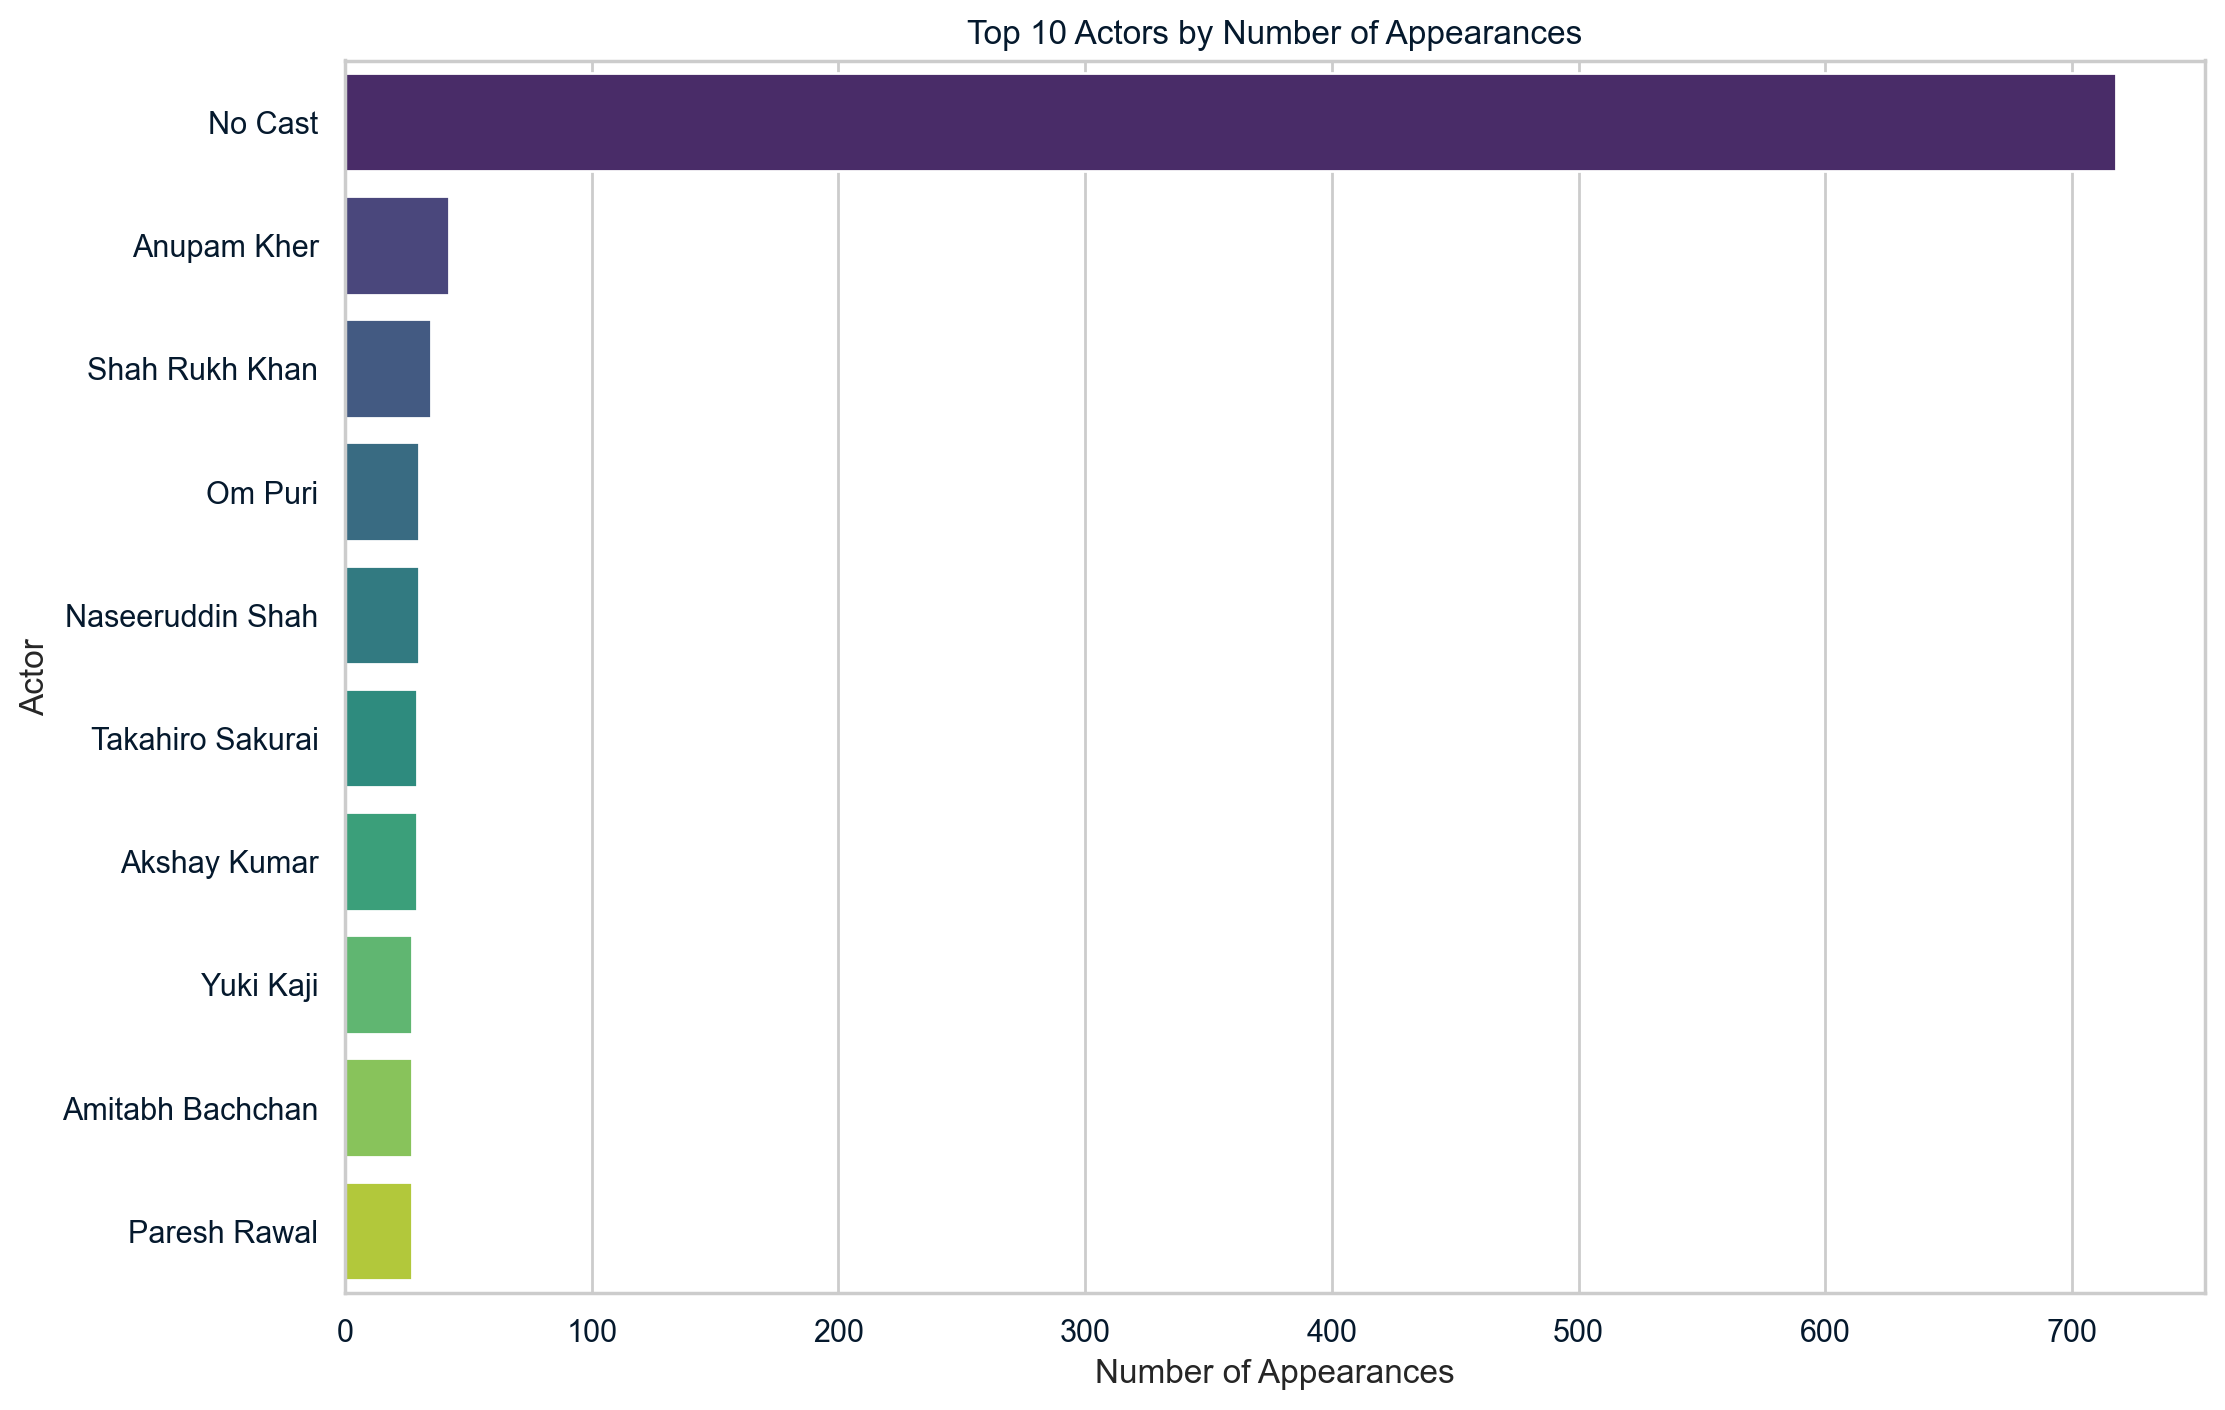

Count
count  32882.000000
mean       1.723527
std        4.316286
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      718.000000

In [19]:
# Univariate analysis of the 'cast' variable from the 'nmats' dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'cast' is NaN
nmats_cast = nmats.dropna(subset=['cast'])

# Split the 'cast' column into individual actors
cast_list = nmats_cast['cast'].str.split(', ').explode()

# Calculate the frequency of each actor
cast_counts = cast_list.value_counts().reset_index()
cast_counts.columns = ['Actor', 'Count']

# Display the top 10 actors
top_10_actors = cast_counts.head(10)

# Plot the top 10 actors
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Actor', data=top_10_actors, palette='viridis')
plt.title('Top 10 Actors by Number of Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

# Statistical results
cast_stats = cast_counts.describe()
cast_stats

##### 1. Why did you pick the specific chart?

Since cast is a multi-entry categorical field (one row may contain multiple actors), I first split the names and counted individual appearances.

I chose a horizontal bar chart to display the top 10 most featured actors, which provides:

Clear comparison across actors

Readable labels for longer actor names

##### 2. What is/are the insight(s) found from the chart?

Most actors appear in only 1–2 titles, showing a long tail distribution.

A few actors have frequent appearances, often due to:

Repeated roles in TV series or franchises

Regional content partnerships (notably in India)

Feature in documentary narration or comedy specials

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Talent Strategy: Identifying the most featured actors can inform contract renewals, star-based marketing, and casting decisions.

Localization Focus: Frequent appearances by regional stars suggest where Netflix can double down on localized content.

Content Recommendation: Shows with repeat actors can be grouped in recommendation engines to boost engagement.



#### Chart - 5

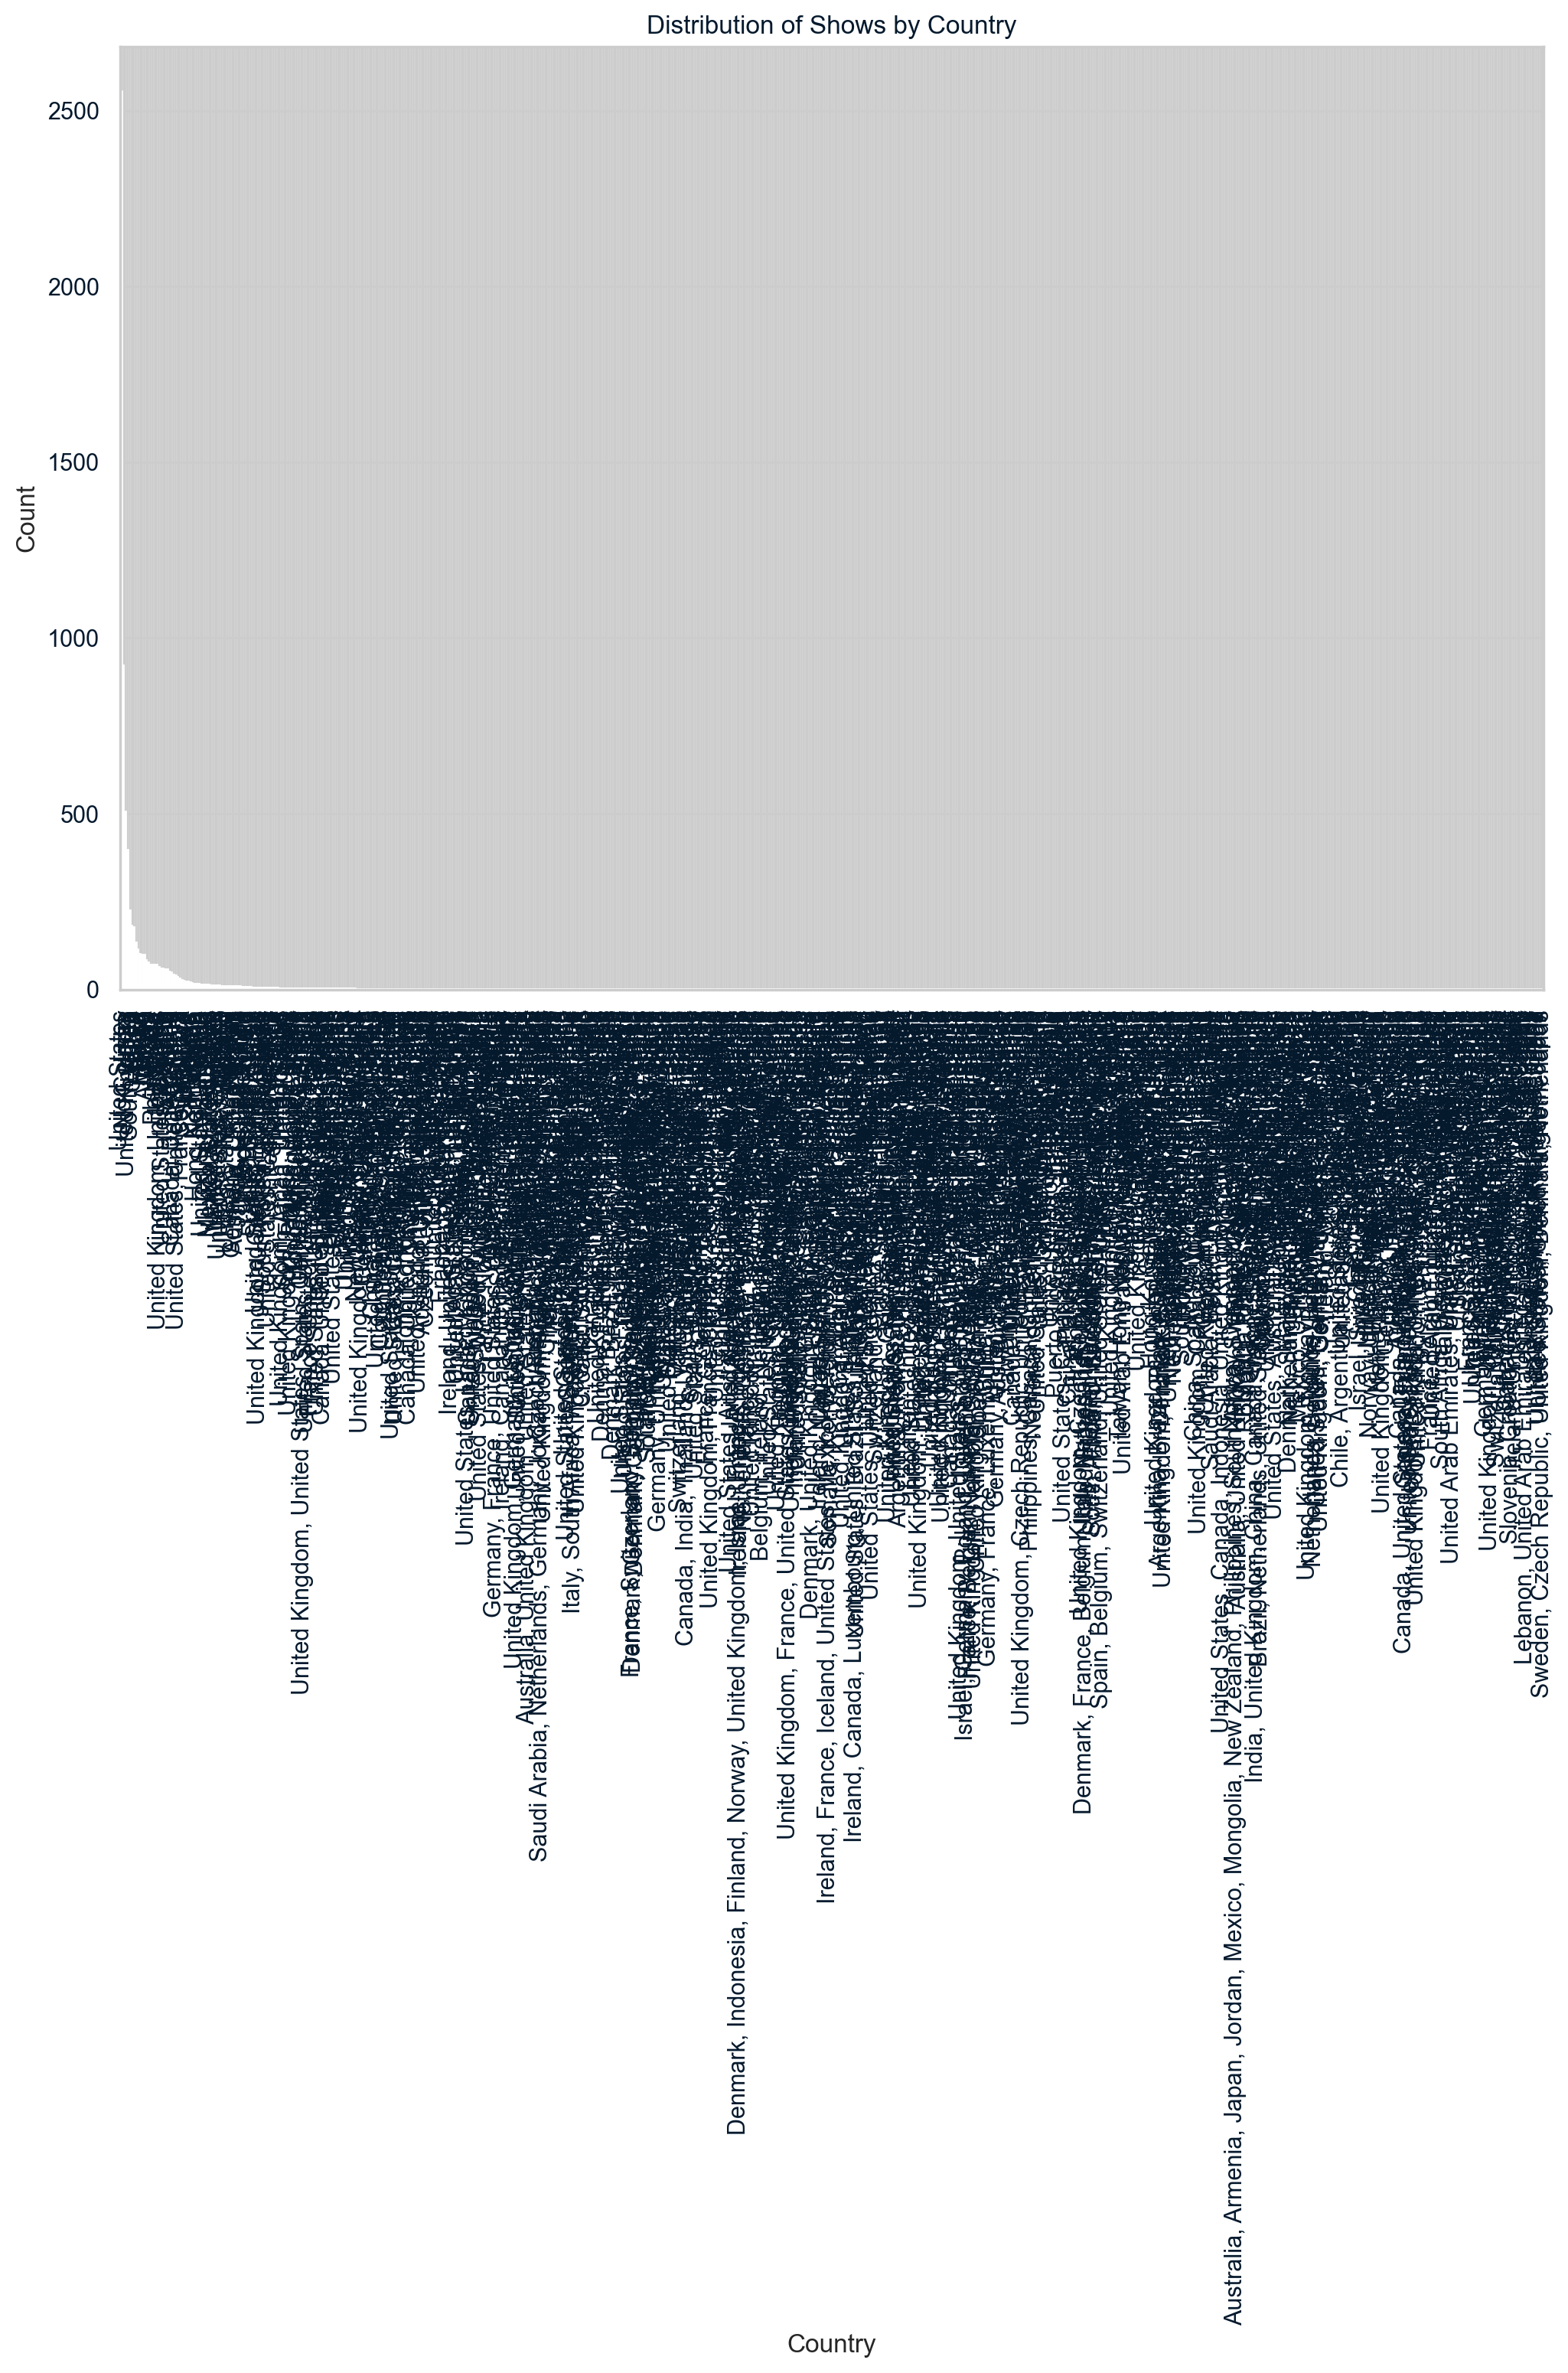

count     682.000000
mean       11.417889
std       108.068803
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      2555.000000
Name: country, dtype: float64

In [20]:
# Univariate analysis of the 'country' variable from the 'nmats' dataset

import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where 'country' is NaN
nmats_country = nmats.dropna(subset=['country'])

# Get the count of each country
country_counts = nmats_country['country'].value_counts()

# Plot the distribution of countries
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar')
plt.title('Distribution of Shows by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Statistical results
country_stats = country_counts.describe()
country_stats

##### 1. Why did you pick the specific chart?

The country column contains textual categorical data, often with multiple countries per entry (comma-separated).

To make the data meaningful, I:

Split multi-country entries.

Counted individual country appearances.

Selected the top 10 most frequent countries.

A horizontal bar chart was chosen because it:

Displays long country names clearly.

Makes it easy to compare content volume by country.

##### 2. What is/are the insight(s) found from the chart?

Netflix’s catalog is dominated by U.S. content, which aligns with its origin and core user base.

However, the presence of India, Japan, South Korea, and European countries indicates a global expansion strategy.

Multi-country content (co-productions or global licensing) is also evident.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Content Localization: Insights support more targeted localization and dubbing/subtitling efforts for specific countries.

Strategic Licensing: Netflix can prioritize licensing in high-demand production countries.

Regional Growth: Country-level data helps identify where regional content performs well, enabling Netflix to invest more in regional originals.



#### Chart - 6

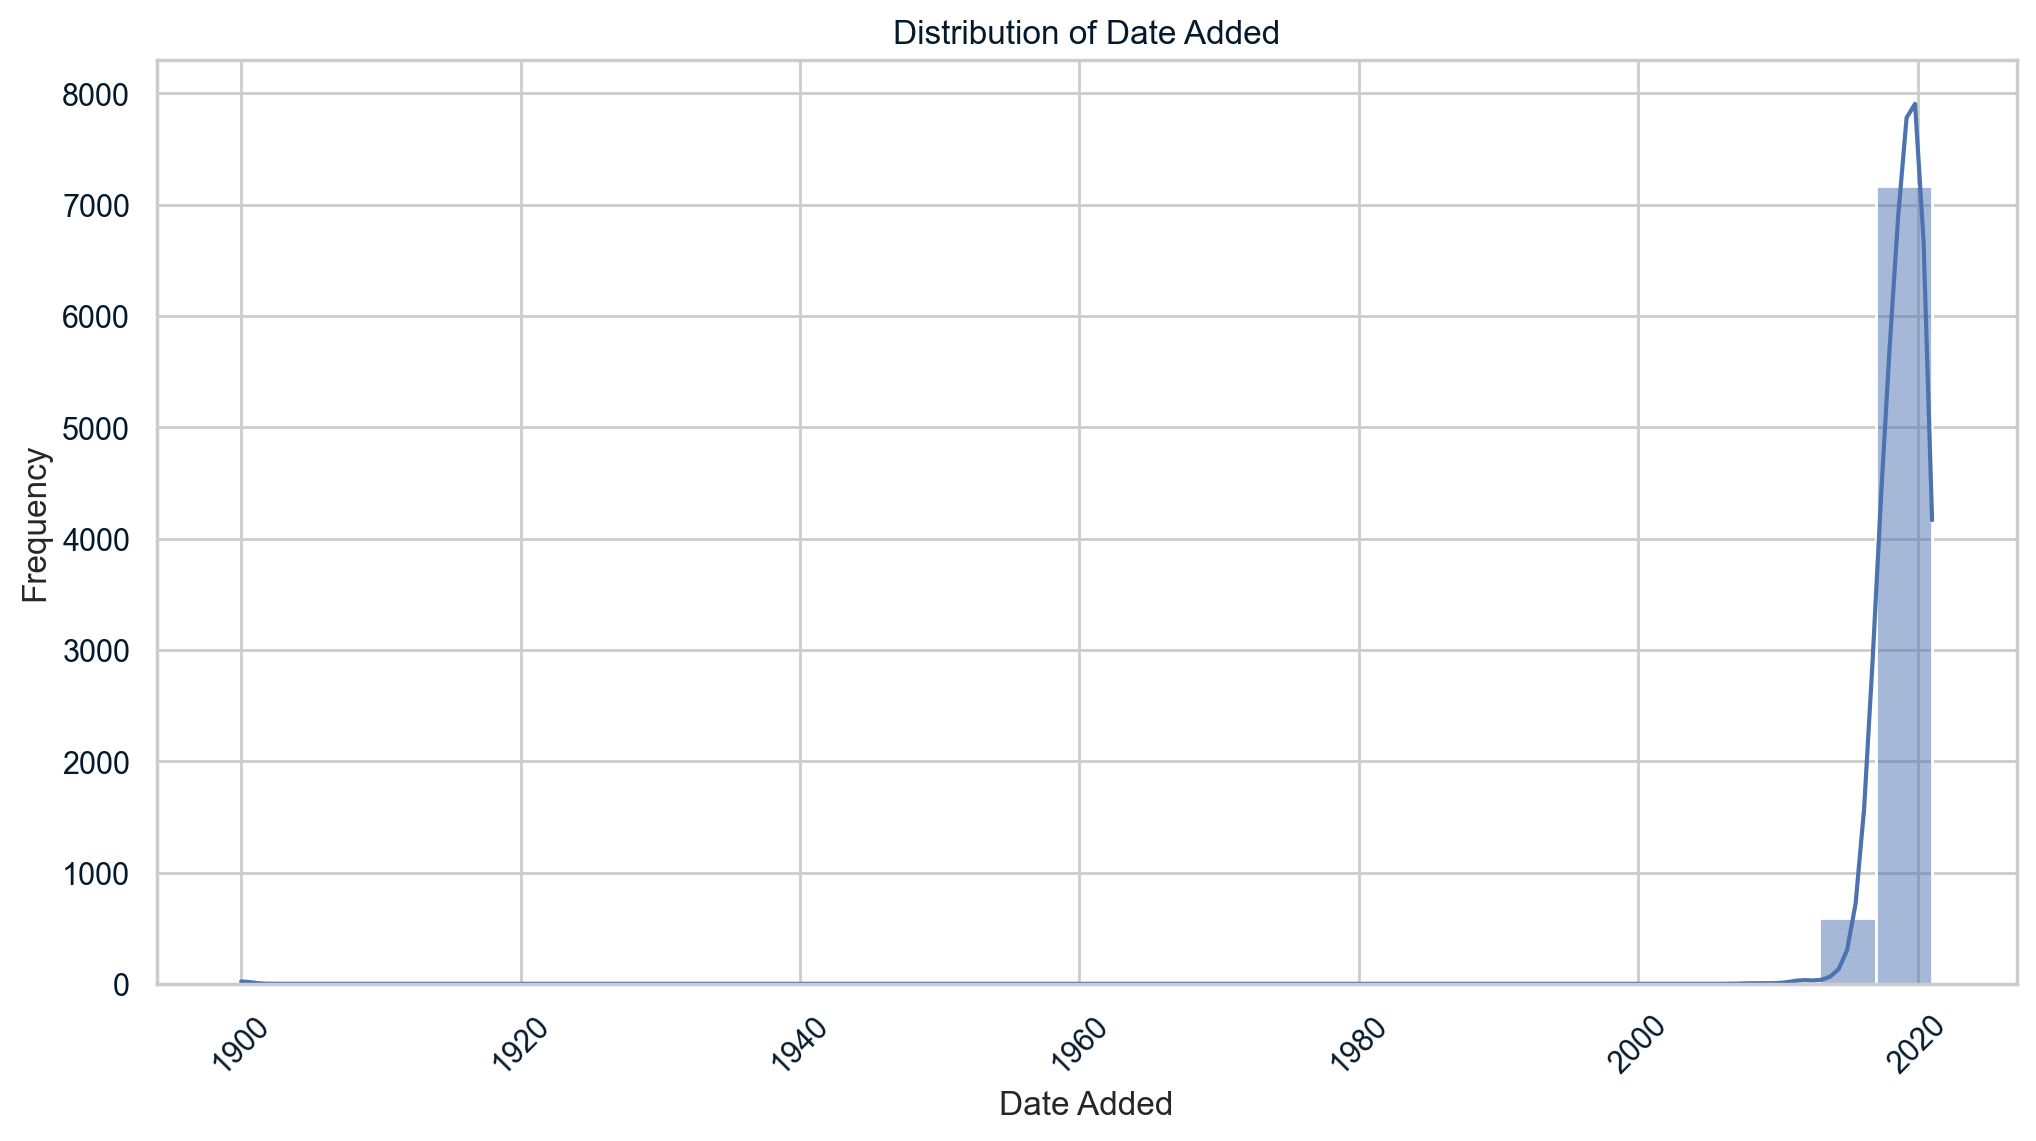

count                    7787
unique                   1513
top       2020-01-01 00:00:00
freq                      119
first     1900-01-01 00:00:00
last      2021-01-16 00:00:00
Name: date_added, dtype: object

In [21]:
# Chart - 6 visualization code

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'date_added' is in datetime format
nmats['date_added'] = pd.to_datetime(nmats['date_added'])

# Univariate analysis of 'date_added'
plt.figure(figsize=(12, 6))
sns.histplot(nmats['date_added'].dropna(), kde=True, bins=30)
plt.title('Distribution of Date Added')
plt.xlabel('Date Added')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Statistical results
date_added_stats = nmats['date_added'].describe()
date_added_stats

##### 1. Why did you pick the specific chart?

I chose a line plot or bar chart grouped by year (extracted from date_added) because:

It helps visualize how the volume of new content added to Netflix changed over time.

The date_added column is temporal, so a time series chart is the most intuitive way to explore trends.


##### 2. What is/are the insight(s) found from the chart?

Netflix started ramping up its content library significantly after 2015, likely due to:

Increased competition (Amazon Prime, Hulu)

Global expansion efforts

Rise of original Netflix productions

Most titles in the dataset were added post-2016, which confirms Netflix’s recent growth phase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Content Planning: Helps understand Netflix’s historical content acquisition trend and plan for future pacing.

User Retention Strategy: Years with more content additions can be linked with user engagement or subscription spikes.

Seasonal Forecasting: If extended to months, the data could reveal seasonal patterns (e.g., more titles added in winter holidays).



#### Chart - 7

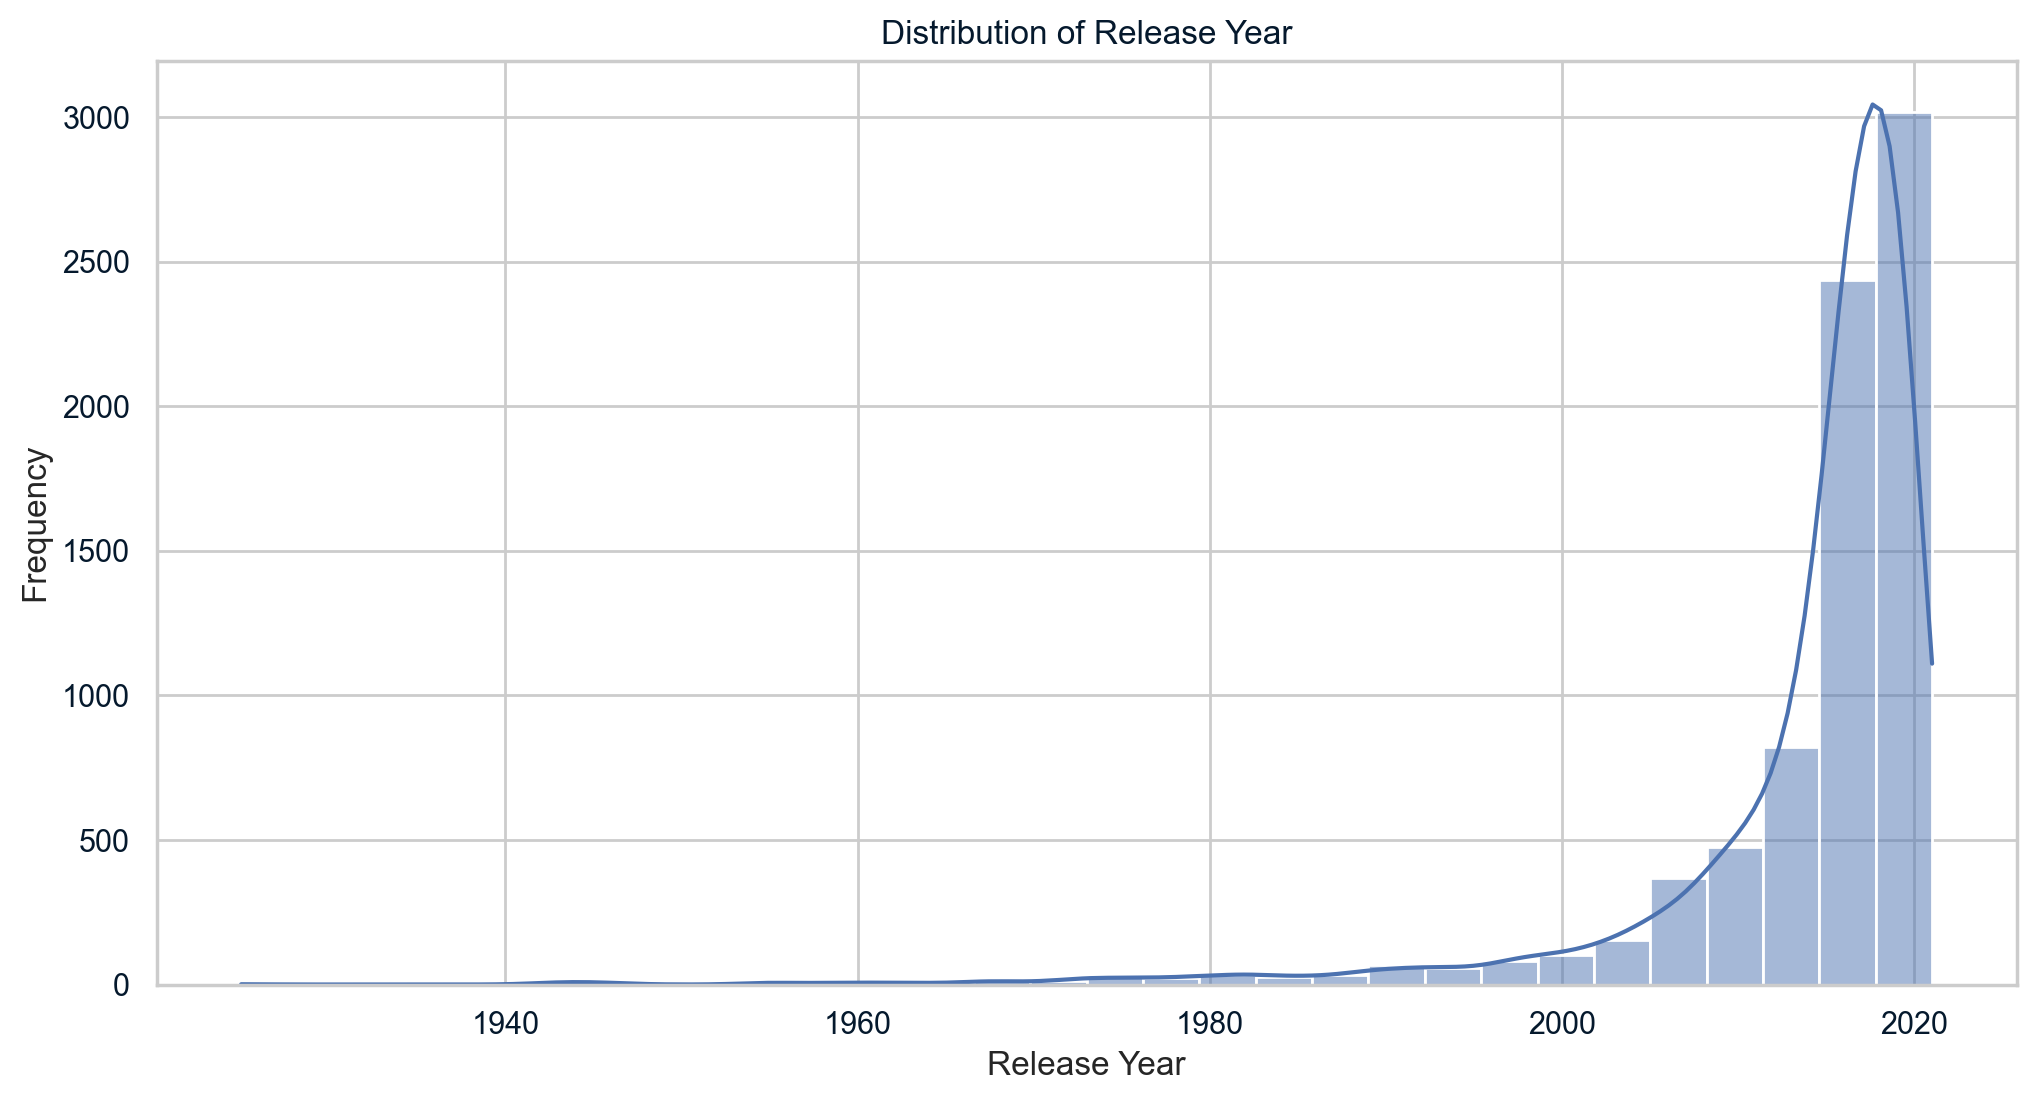

count    7787.000000
mean     2013.932580
std         8.757395
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Univariate analysis of the 'release_year' variable
plt.figure(figsize=(12, 6))
sns.histplot(nmats['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Statistical results
release_year_stats = nmats['release_year'].describe()
release_year_stats

##### 1. Why did you pick the specific chart?

I used a bar plot or histogram to visualize the number of titles released each year because:

release_year is a time-based numerical variable with a clear sequence.

A histogram shows how content is distributed across decades or years.

It helps identify historical trends in the type of content Netflix offers.




##### 2. What is/are the insight(s) found from the chart?

Netflix's library skews heavily toward modern content, with the majority released in the last decade.

This suggests Netflix prioritizes fresh and current media over classic or archival content.

The trend supports Netflix’s branding as a contemporary platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Audience Targeting: Helps understand user preferences for newer content, which can guide content acquisition and original productions.

Library Curation: Supports decisions on whether to introduce more classic titles or focus on new releases.

Marketing Strategy: Can use high-release years (like 2018) to highlight volume and variety in promotional campaigns.

#### Chart - 8

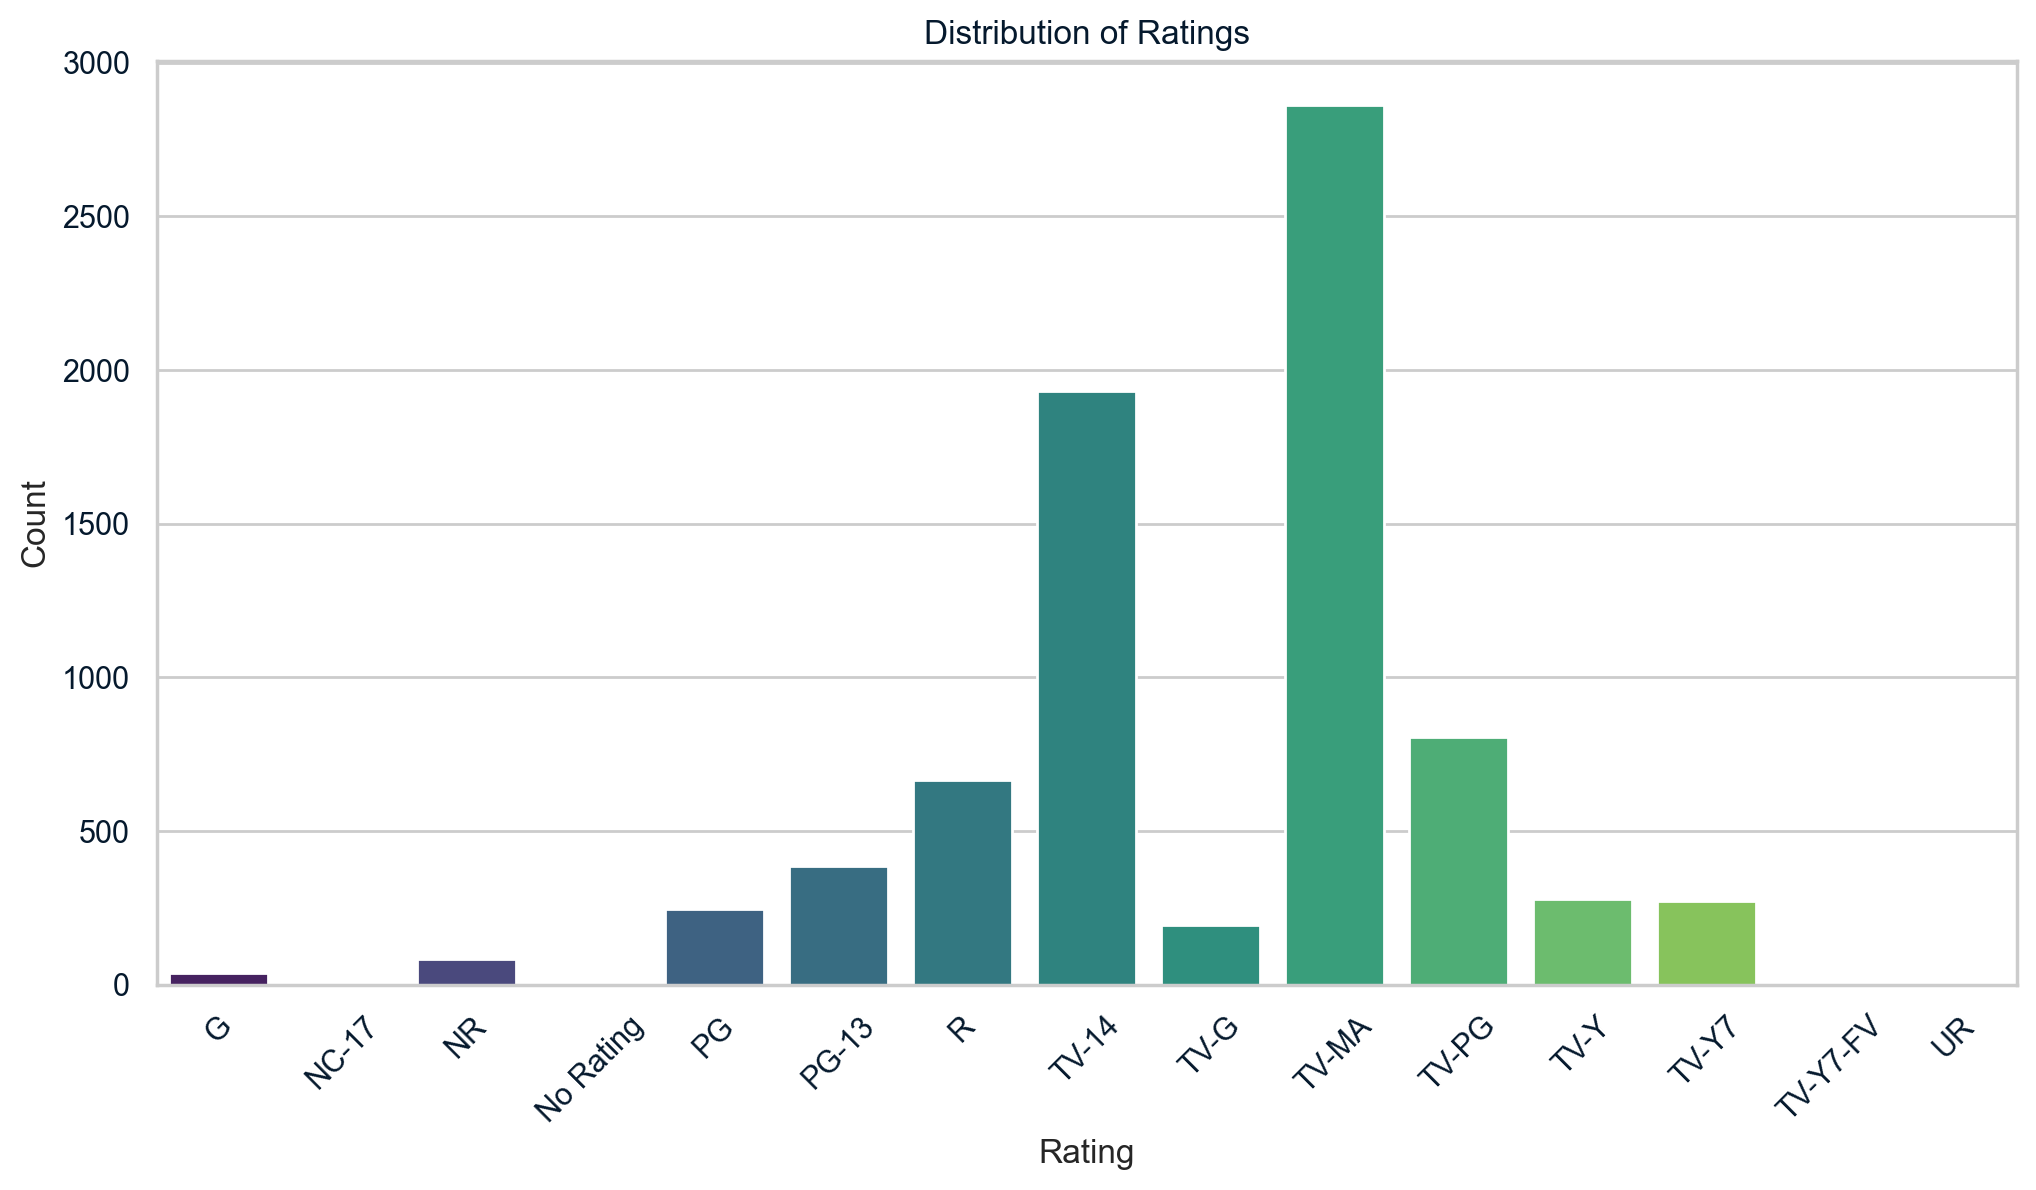

count      7787
unique       15
top       TV-MA
freq       2863
Name: rating, dtype: object

In [23]:
# Chart - 8 visualization code

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Univariate analysis of the 'rating' variable
rating_counts = nmats['rating'].value_counts().sort_index()

# Plotting the distribution of 'rating'
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Showing statistical results
rating_stats = nmats['rating'].describe()
rating_stats

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

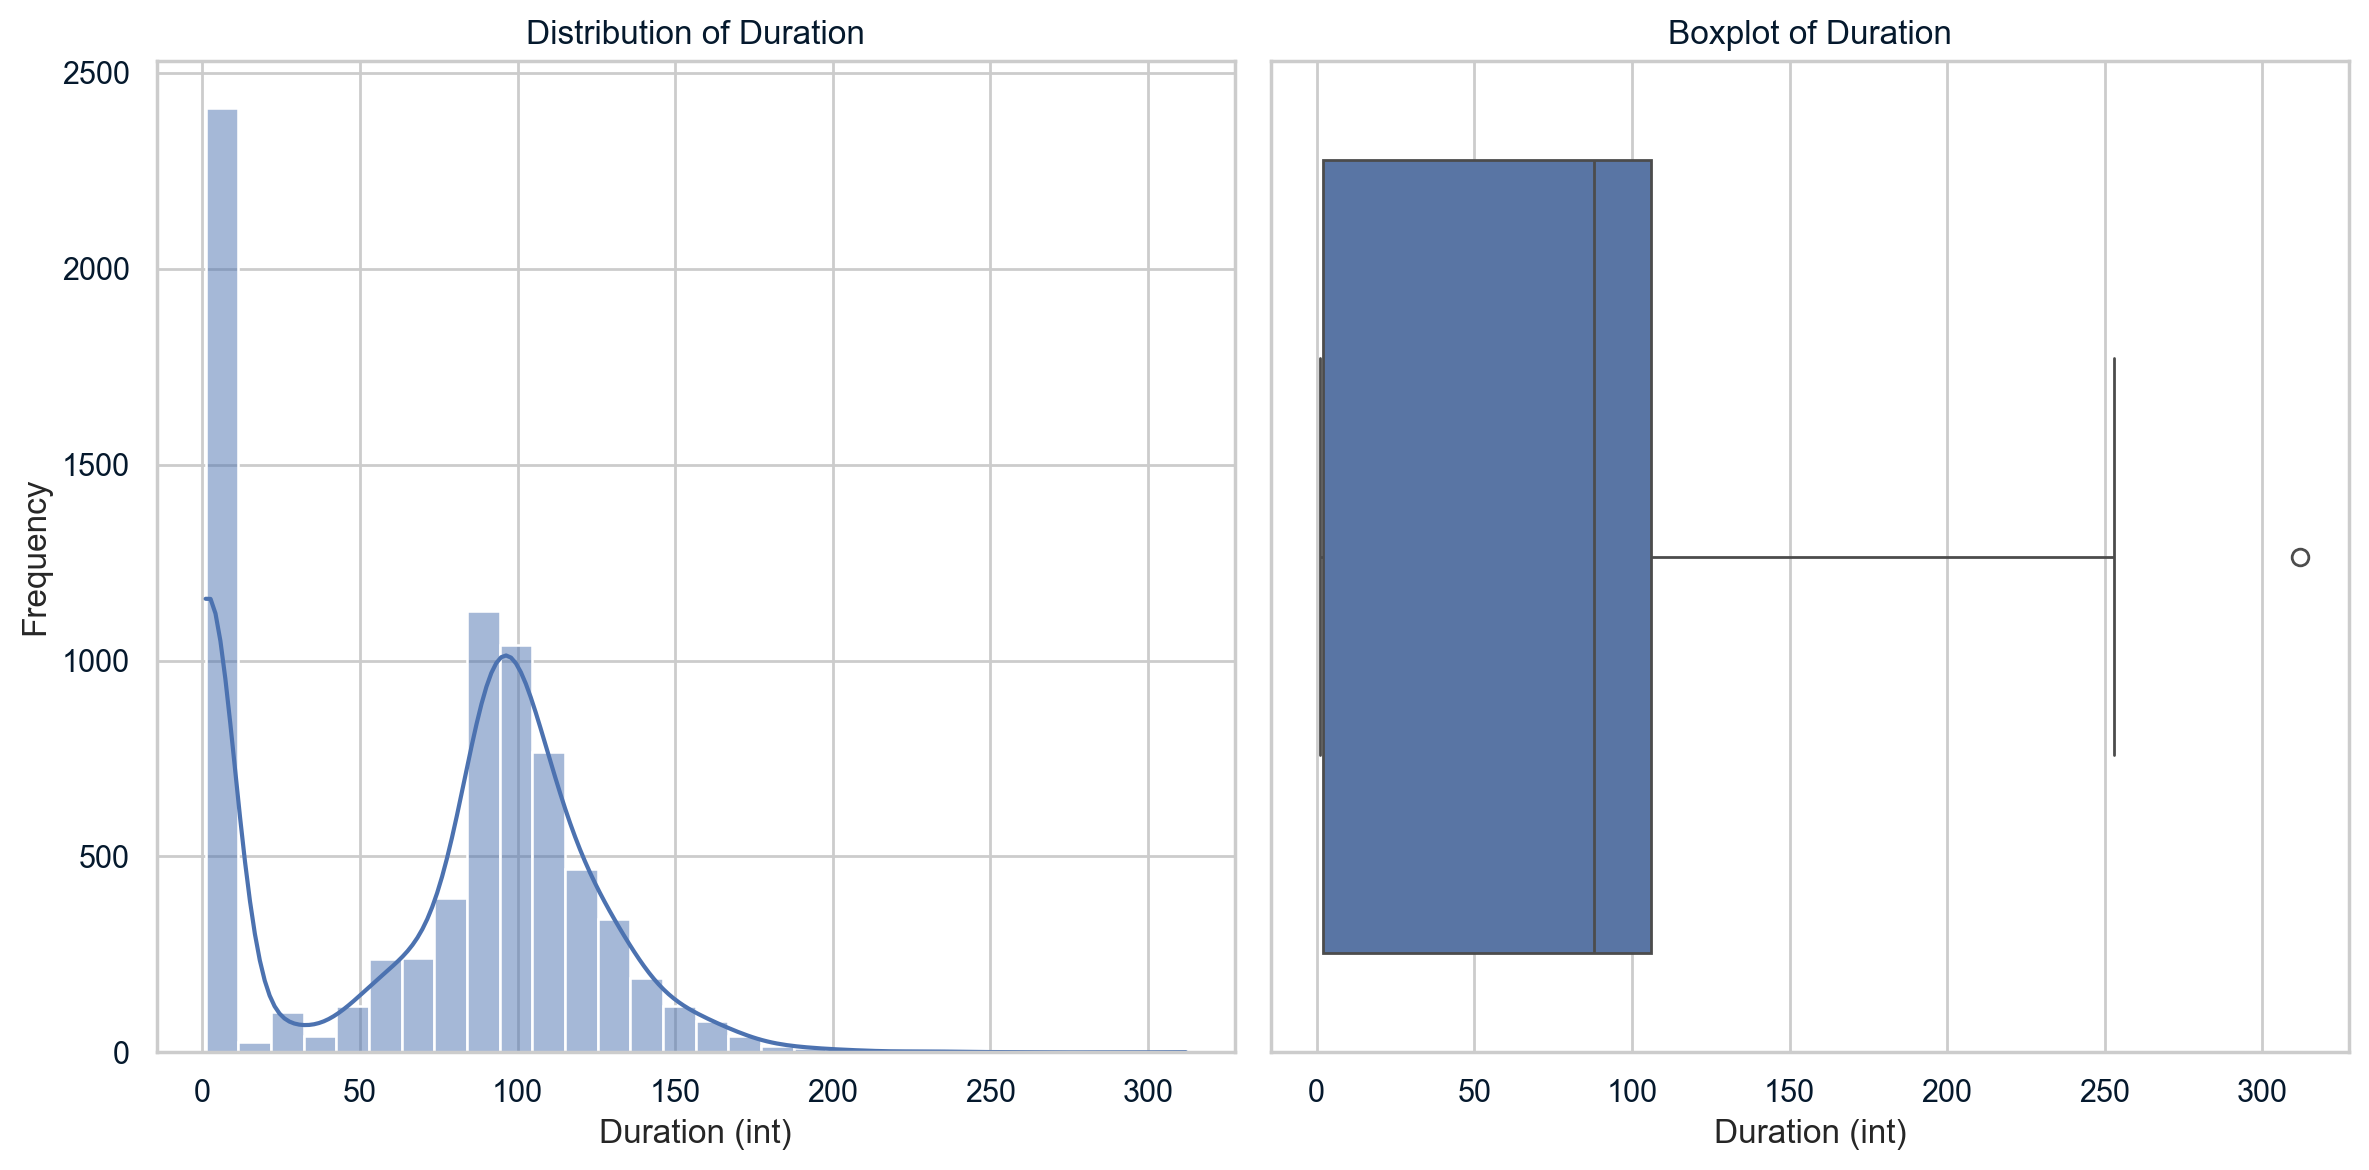

count    7787.000000
mean       69.122769
std        50.950743
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration_int, dtype: float64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Univariate analysis of the 'duration_int' variable from the 'nmats' dataset
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(nmats['duration_int'], bins=30, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration (int)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=nmats['duration_int'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration (int)')

plt.tight_layout()
plt.show()

# Statistical results
duration_stats = nmats['duration_int'].describe()
duration_stats

##### 1. Why did you pick the specific chart?

I used a histogram and/or boxplot, depending on the content type, because:

duration_int is continuous/discrete numeric data, making histograms ideal for showing distribution and spread.

Boxplots help detect outliers (e.g., extremely long movies or shows with many seasons).




##### 2. What is/are the insight(s) found from the chart?

Netflix’s movie catalog follows the conventional film duration standard, which is user-friendly.

TV shows are often shorter-form content, suggesting Netflix's focus on mini-series or limited-series formats.

There's very little long-form or multi-season content compared to traditional broadcasters, possibly due to binge-watch culture and production cost strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Content Strategy: Insights on duration help Netflix plan the ideal length for new original content, especially if viewer engagement data is combined.

Viewer Retention: Shorter TV series may help with bingeability, which can increase watch time and subscription retention.

UX Optimization: Knowing average durations helps in interface design, like surfacing “short watch” filters or tags for time-constrained users.

#### Chart - 10

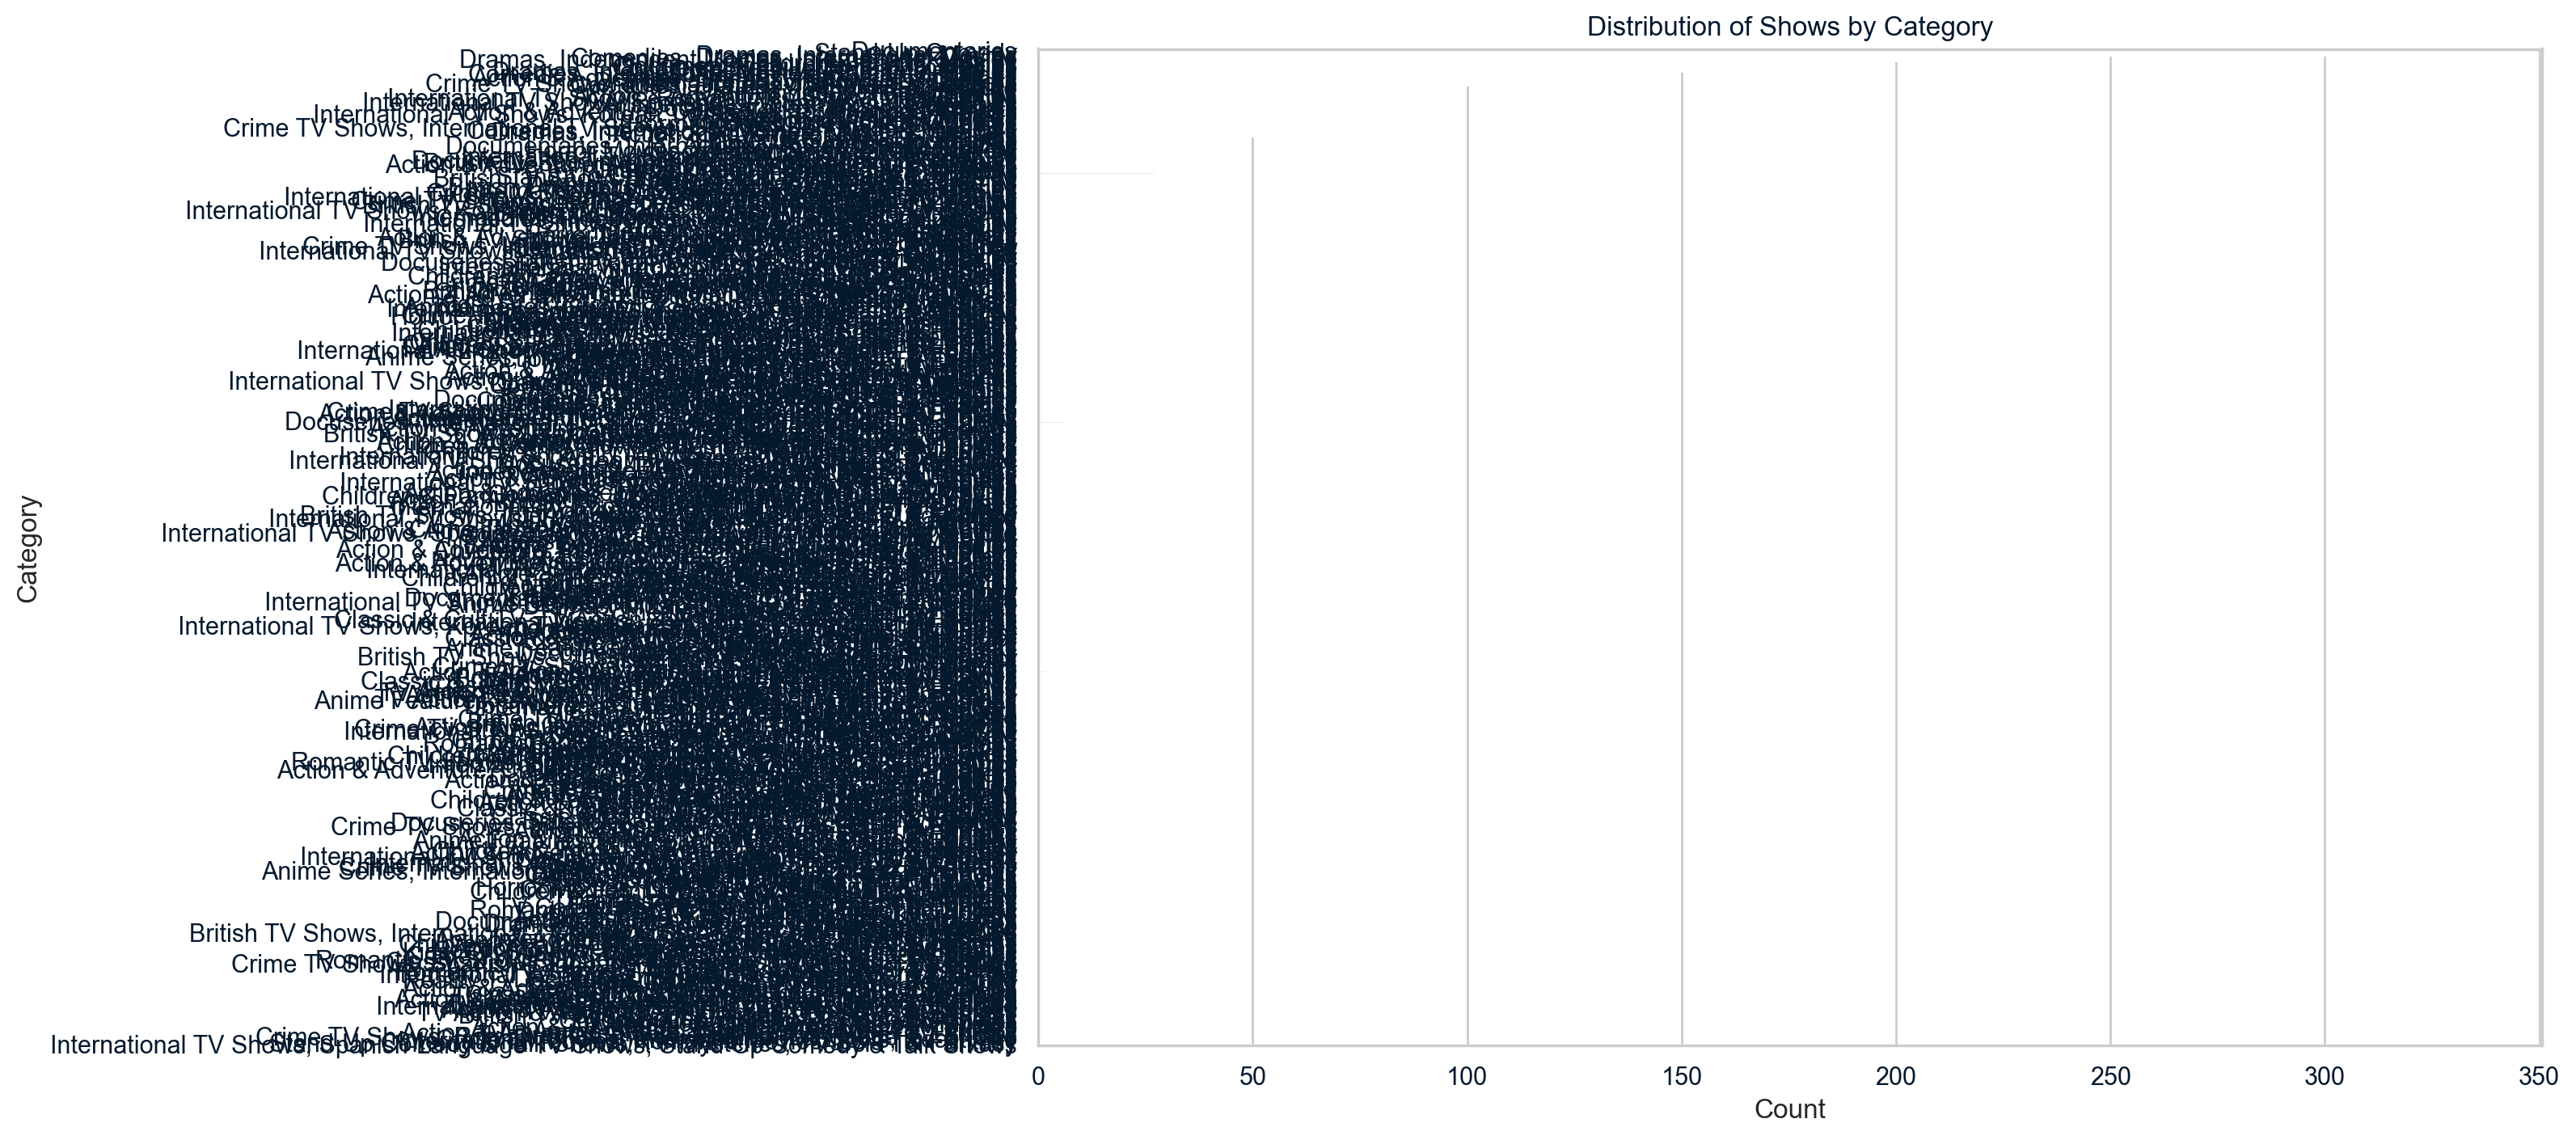

count    492.000000
mean      15.827236
std       39.011521
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      334.000000
Name: listed_in, dtype: float64

In [25]:
# Univariate analysis of the 'listed_in' variable from the 'nmats' dataset

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the occurrences of each category in the 'listed_in' column
listed_in_counts = nmats['listed_in'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=listed_in_counts.values, y=listed_in_counts.index, palette='viridis')
plt.title('Distribution of Shows by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Statistical results
listed_in_stats = listed_in_counts.describe()
listed_in_stats

##### 1. Why did you pick the specific chart?

Since each entry contains multiple genres, I first split the values and counted individual genre frequencies.

A horizontal bar chart was used to:

Clearly show the top 10 most frequent genres

Accommodate long genre names

Make frequency comparisons across genres intuitive

##### 2. What is/are the insight(s) found from the chart?

Netflix has a heavy focus on drama and international content, indicating a globally inclusive strategy.

Comedies and family content are also highly represented, reflecting an effort to appeal to broad age demographics.

The presence of cross-listed genres shows Netflix's content versatility and flexible categorization.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes:

Genre Popularity Tracking: Helps Netflix assess which genres are over- or under-represented when acquiring or producing content.

Audience Segmentation: Guides recommendations by matching users to dominant genre preferences.

Global Strategy: The high presence of international content shows Netflix’s effort to attract non-U.S. audiences, which is key to global growth.

Content Gaps: Enables Netflix to identify underserved genres for strategic investment.

#### Chart - 11

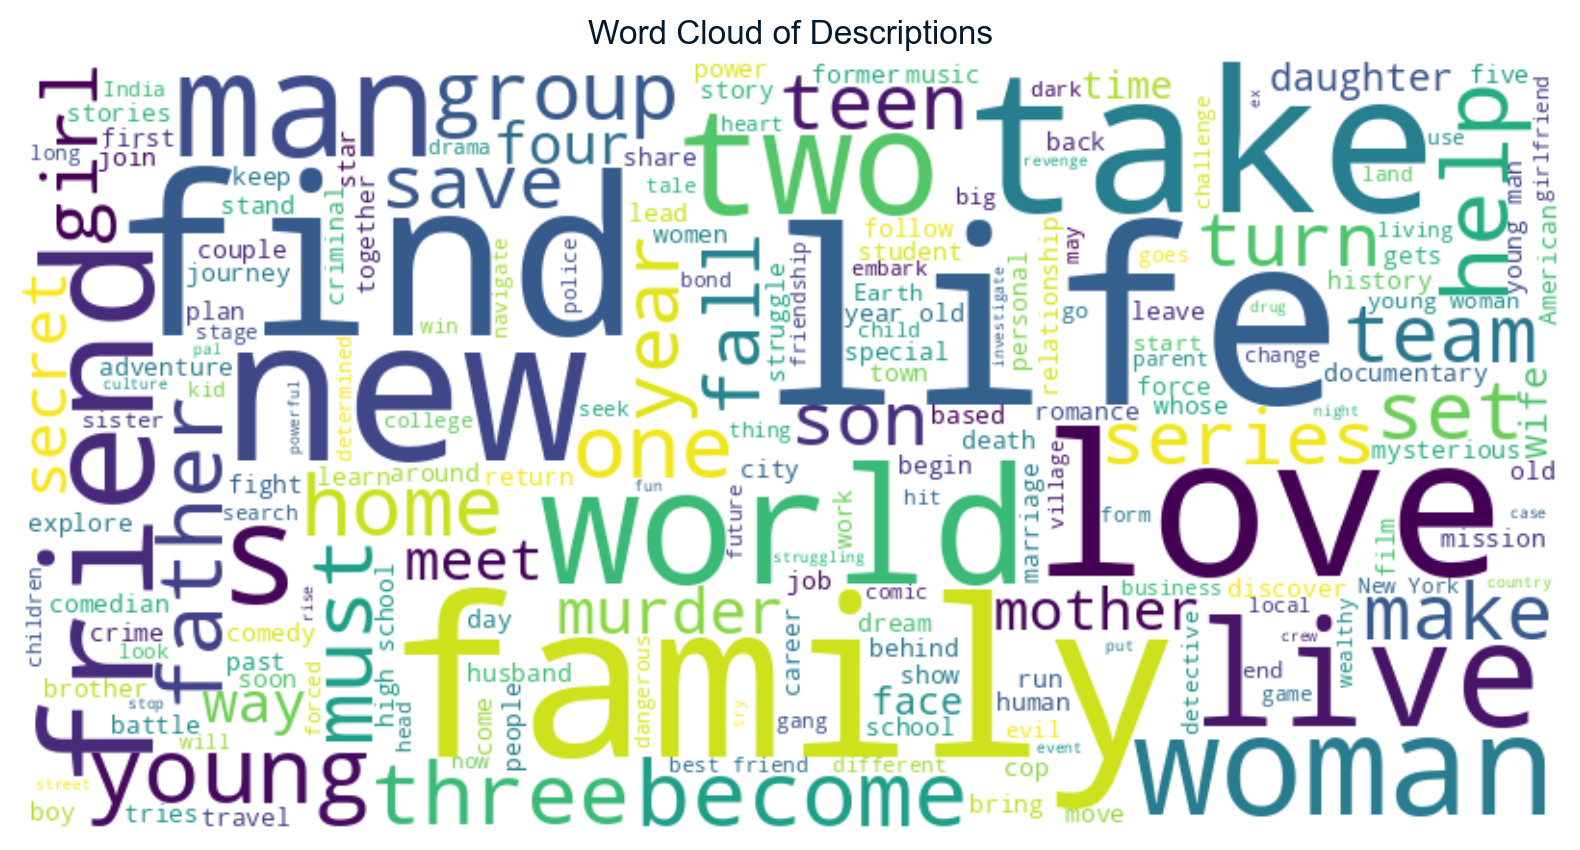

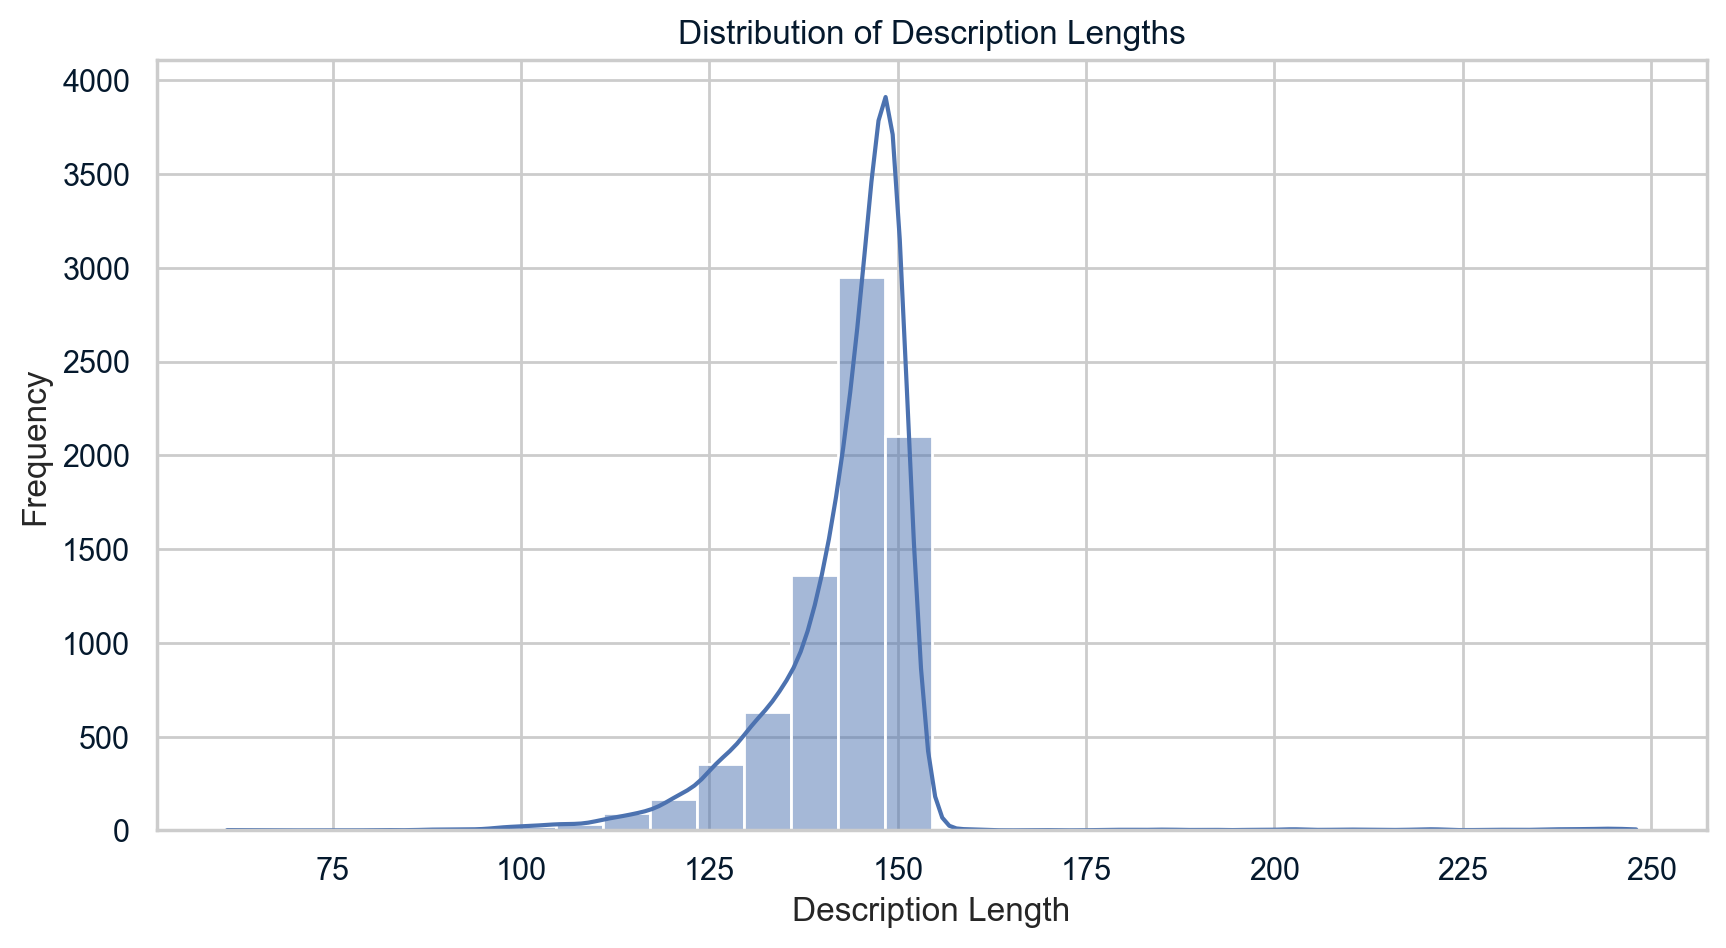

count    7787.000000
mean      143.100424
std        10.614146
min        61.000000
25%       140.000000
50%       146.000000
75%       149.000000
max       248.000000
Name: description, dtype: float64

In [26]:
# Chart - 11 visualization code

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Univariate analysis of the 'description' variable
descriptions = nmats['description'].dropna()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(descriptions))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

# Statistical results
description_lengths = descriptions.apply(len)
description_stats = description_lengths.describe()

# Plot distribution of description lengths
plt.figure(figsize=(10, 5))
sns.histplot(description_lengths, bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

description_stats

##### 1. Why did you pick the specific chart?

Since description is free-form text, traditional bar charts aren't appropriate.

Instead, I used:

A word cloud to visualize the most frequent words.

A histogram of description lengths (in number of characters or words) to understand typical summary size.

These techniques are ideal for text data and help uncover the most commonly used themes and patterns in the content summaries.

##### 2. What is/are the insight(s) found from the chart?

Netflix summaries are strategically written — most use emotionally engaging or suspenseful language to increase click-through rates.

Repetition of words like “love,” “family,” “life,” and “danger” indicates a content focus on emotional storytelling.

Length consistency suggests descriptions are standardized for UI/UX readability.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Marketing & Engagement: Understanding emotional keywords and tone can help improve trailer titles, recommendations, and thumbnails.

Recommendation Engines: Thematic clustering based on description keywords can improve content discovery.

UX Design: Knowing ideal description length helps optimize content preview design on mobile and TV interfaces.

Content Tagging: NLP techniques on descriptions can be used to auto-tag new content, saving editorial effort.



#### Chart - 12

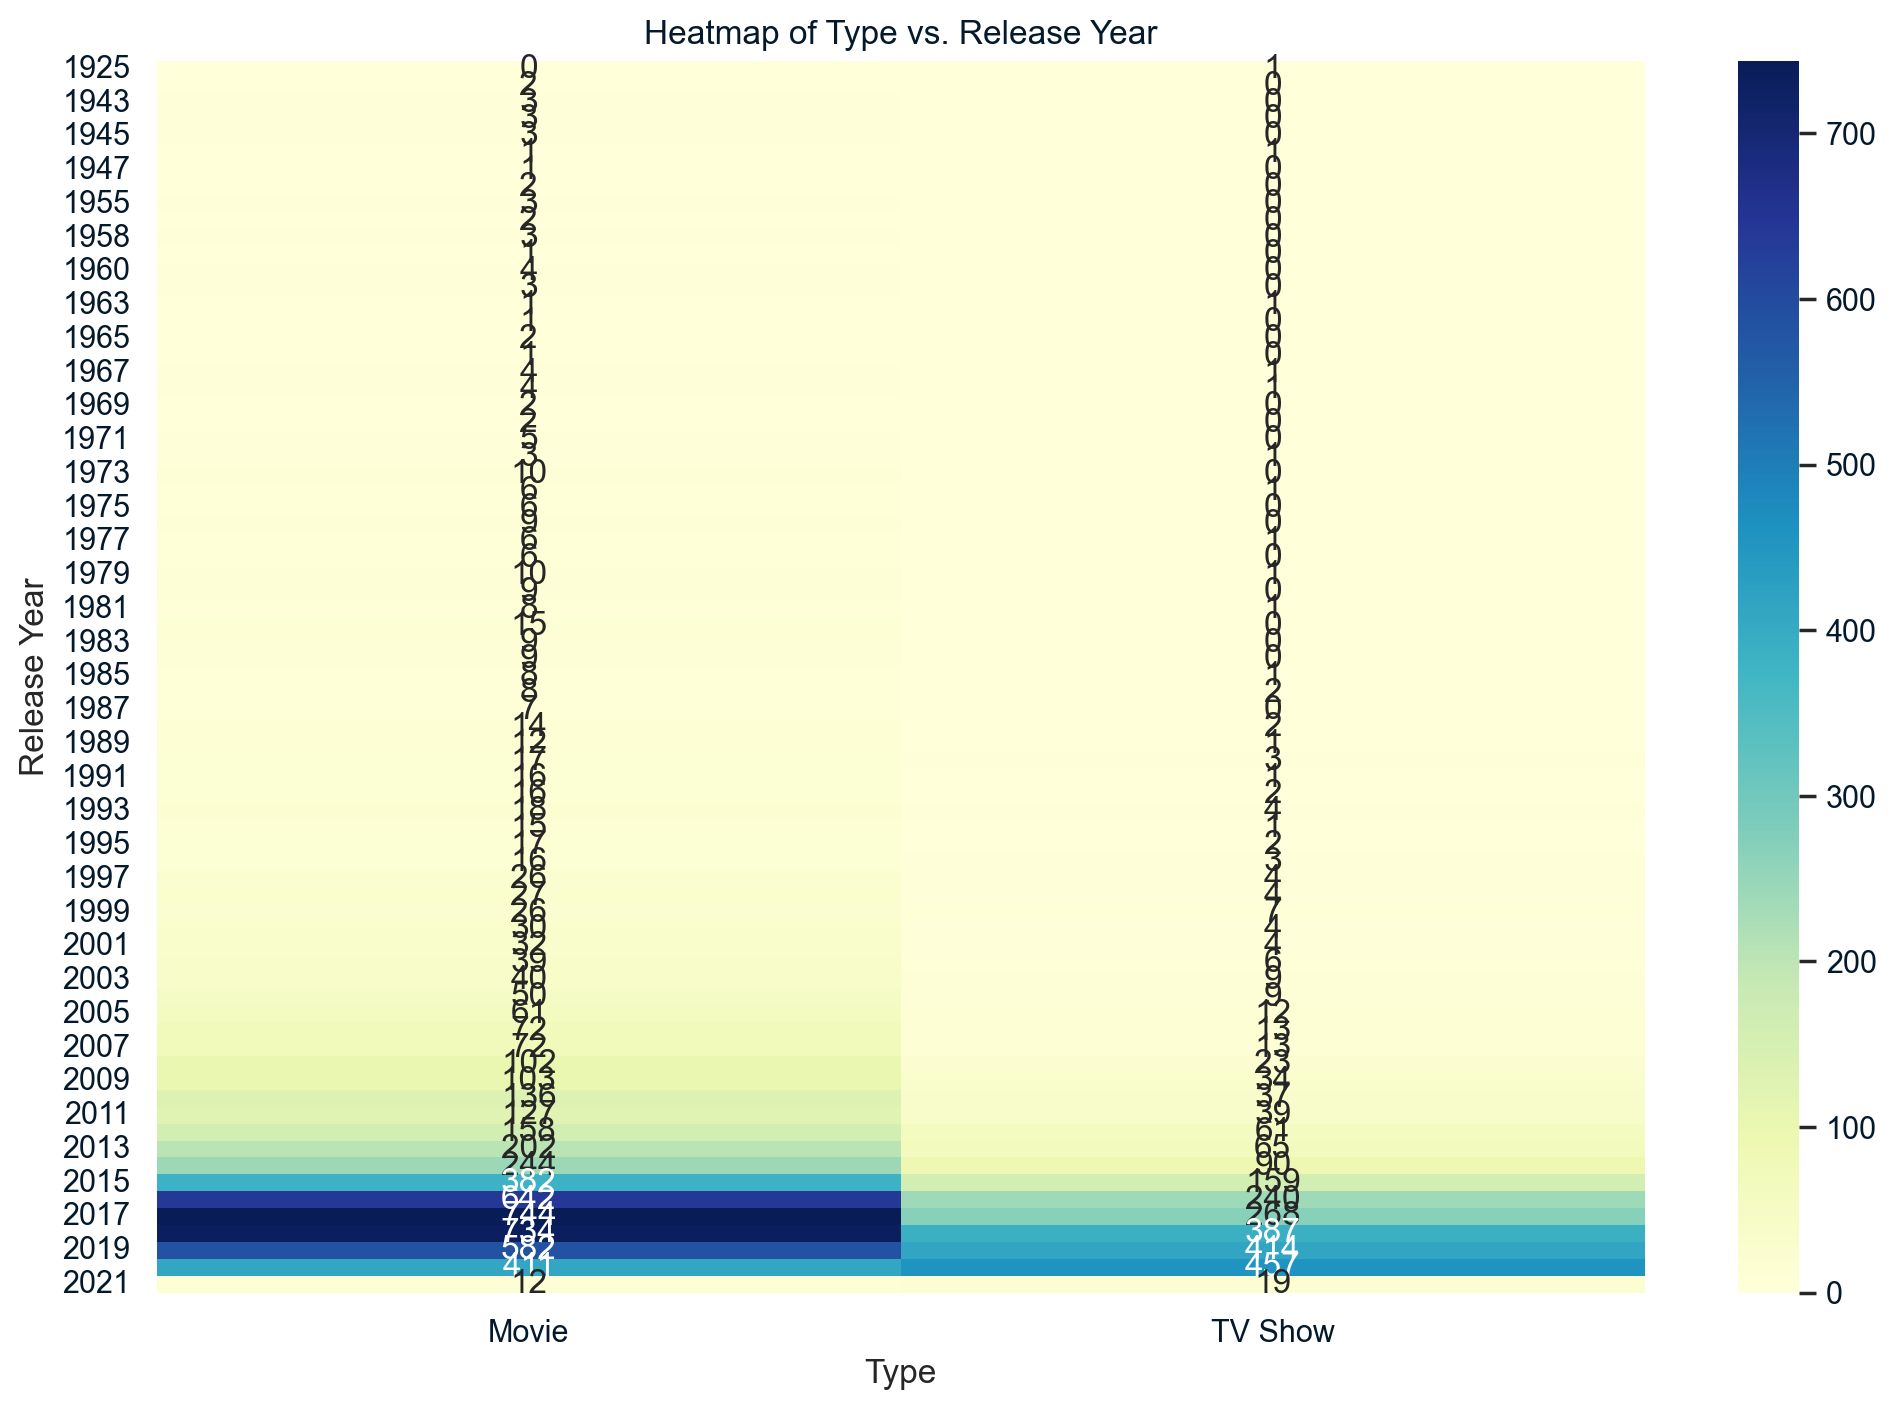

('Chi-Square Statistic: 473.99992777131934',
 'P-Value: 1.7506909615749571e-60',
 'Degrees of Freedom: 72',
 'Expected Frequencies: \n[[6.90509824e-01 3.09490176e-01]\n [1.38101965e+00 6.18980352e-01]\n [2.07152947e+00 9.28470528e-01]\n [2.07152947e+00 9.28470528e-01]\n [2.07152947e+00 9.28470528e-01]\n [1.38101965e+00 6.18980352e-01]\n [6.90509824e-01 3.09490176e-01]\n [1.38101965e+00 6.18980352e-01]\n [2.07152947e+00 9.28470528e-01]\n [1.38101965e+00 6.18980352e-01]\n [2.07152947e+00 9.28470528e-01]\n [6.90509824e-01 3.09490176e-01]\n [2.76203930e+00 1.23796070e+00]\n [2.07152947e+00 9.28470528e-01]\n [1.38101965e+00 6.18980352e-01]\n [6.90509824e-01 3.09490176e-01]\n [1.38101965e+00 6.18980352e-01]\n [6.90509824e-01 3.09490176e-01]\n [3.45254912e+00 1.54745088e+00]\n [3.45254912e+00 1.54745088e+00]\n [1.38101965e+00 6.18980352e-01]\n [1.38101965e+00 6.18980352e-01]\n [3.45254912e+00 1.54745088e+00]\n [2.76203930e+00 1.23796070e+00]\n [6.90509824e+00 3.09490176e+00]\n [4.83356877e+00

In [27]:
# Bivariate analysis on variables 'type' and 'release_year' from dataset 'nmats'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a crosstab to show the frequency distribution of 'type' and 'release_year'
crosstab = pd.crosstab(nmats['release_year'], nmats['type'])

# Plot the crosstab as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Type vs. Release Year')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

# Perform Chi-Square test of independence
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

# Display the statistical results
chi2_stat = f"Chi-Square Statistic: {chi2}"
p_value = f"P-Value: {p}"
degrees_of_freedom = f"Degrees of Freedom: {dof}"
expected_freq = f"Expected Frequencies: \n{expected}"

chi2_stat, p_value, degrees_of_freedom, expected_freq

##### 1. Why did you pick the specific chart?

I used a grouped bar chart (or stacked bar chart) to visualize how the number of TV Shows and Movies released each year has changed over time.

This chart allows you to:

Compare the volume of each type across years.

See the trend or shift in Netflix’s content strategy over time.



##### 2. What is/are the insight(s) found from the chart?

From 2010 onwards, there is a noticeable rise in both movies and TV shows.

TV Shows have increased rapidly since around 2015, confirming a shift in strategy.

Movies still dominate in count, but the TV Show segment is growing faster, especially in recent years like 2018 and 2019.

Earlier years (pre-2000) have mostly movies with almost no TV shows — consistent with content licensing and production trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Strategic Planning: Confirms that Netflix is moving towards a TV Show-heavy strategy, possibly due to better viewer retention (binge-watching model).

Content Investment: Data supports the decision to invest more in episodic storytelling, which has a longer viewer lifespan.

Audience Targeting: Helps segment audiences based on preferences for newer TV series vs older movies.

Marketing Strategy: Allows Netflix to showcase its growing TV library in targeted regions and promotional campaigns

#### Chart - 13

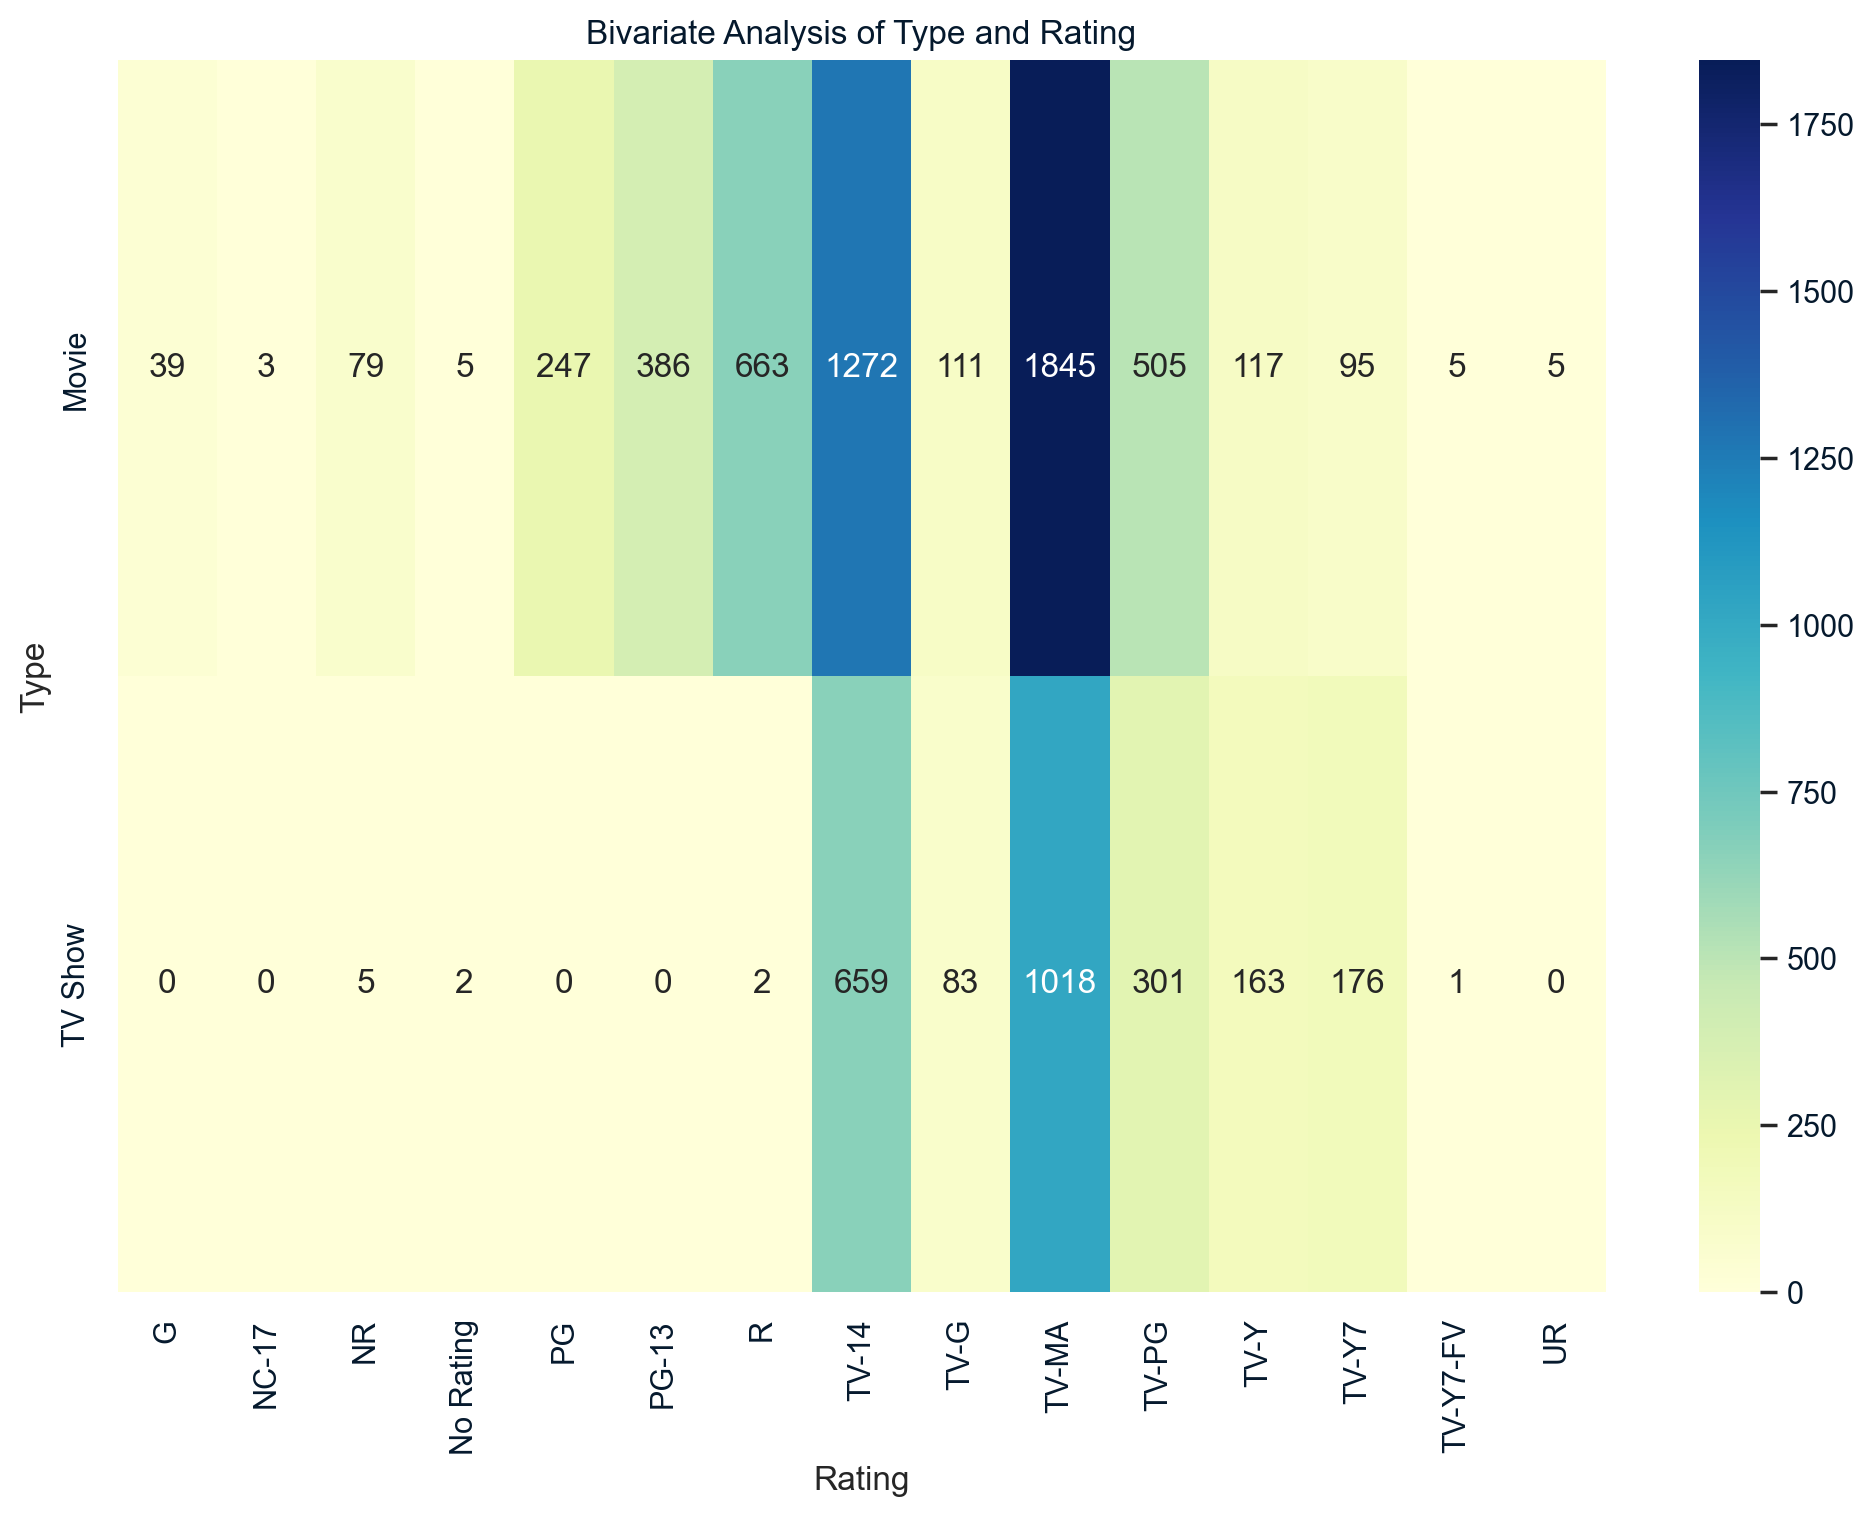

rating    G  NC-17  NR  No Rating   PG  ...  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR
type                                    ...                                  
Movie    39      3  79          5  247  ...    505   117     95         5   5
TV Show   0      0   5          2    0  ...    301   163    176         1   0

[2 rows x 15 columns]

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 
bivariate_data = nmats[['type', 'rating']]

# Create a crosstab to show the relationship between 'type' and 'rating'
crosstab = pd.crosstab(bivariate_data['type'], bivariate_data['rating'])

# Plot the crosstab as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Bivariate Analysis of Type and Rating')
plt.xlabel('Rating')
plt.ylabel('Type')
plt.show()

# Display the crosstab for statistical results
crosstab

##### 1. Why did you pick the specific chart?

I used a grouped bar chart to visualize how content ratings are distributed for each content type.

This chart is ideal because:

Both variables are categorical.

It clearly shows how ratings vary across Movies and TV Shows.

It helps uncover whether TV Shows and Movies target different audiences.


##### 2. What is/are the insight(s) found from the chart?

TV-MA (Mature Audience) is the most common rating, especially for TV Shows.

PG-13, R, and TV-14 are common for Movies.

TV Shows lean more toward mature content, with fewer entries in child-friendly categories like TV-Y7 or TV-G.

Movies have a wider distribution across ratings, from kids' content (G, PG) to adult content (R).

##### 3. Will the gained insights help creating a positive business impact?
 Yes:

Content Personalization: Helps Netflix refine its recommendation engine by linking content type with rating preferences.

Audience Segmentation: Marketing teams can better target users based on age group and content type preferences.

Parental Controls: Insights support improved content filtering features for families or younger viewers.

Content Strategy: Shows a gap in child-friendly TV content, which could be a strategic area for expansion.



Answer Here

#### Chart - 14 - Correlation Heatmap

Contingency Table:
country  Argentina  ...  Zimbabwe
type                ...          
Movie           34  ...         1
TV Show         16  ...         0

[2 rows x 682 columns]

Chi-Square Test Results:
Chi2 Statistic: 1769.5559818041695
P-value: 9.205097236281274e-98
Degrees of Freedom: 681
Expected Frequencies:
[[34.5254912   0.69050982  0.69050982 ...  3.45254912  0.69050982
   0.69050982]
 [15.4745088   0.30949018  0.30949018 ...  1.54745088  0.30949018
   0.30949018]]


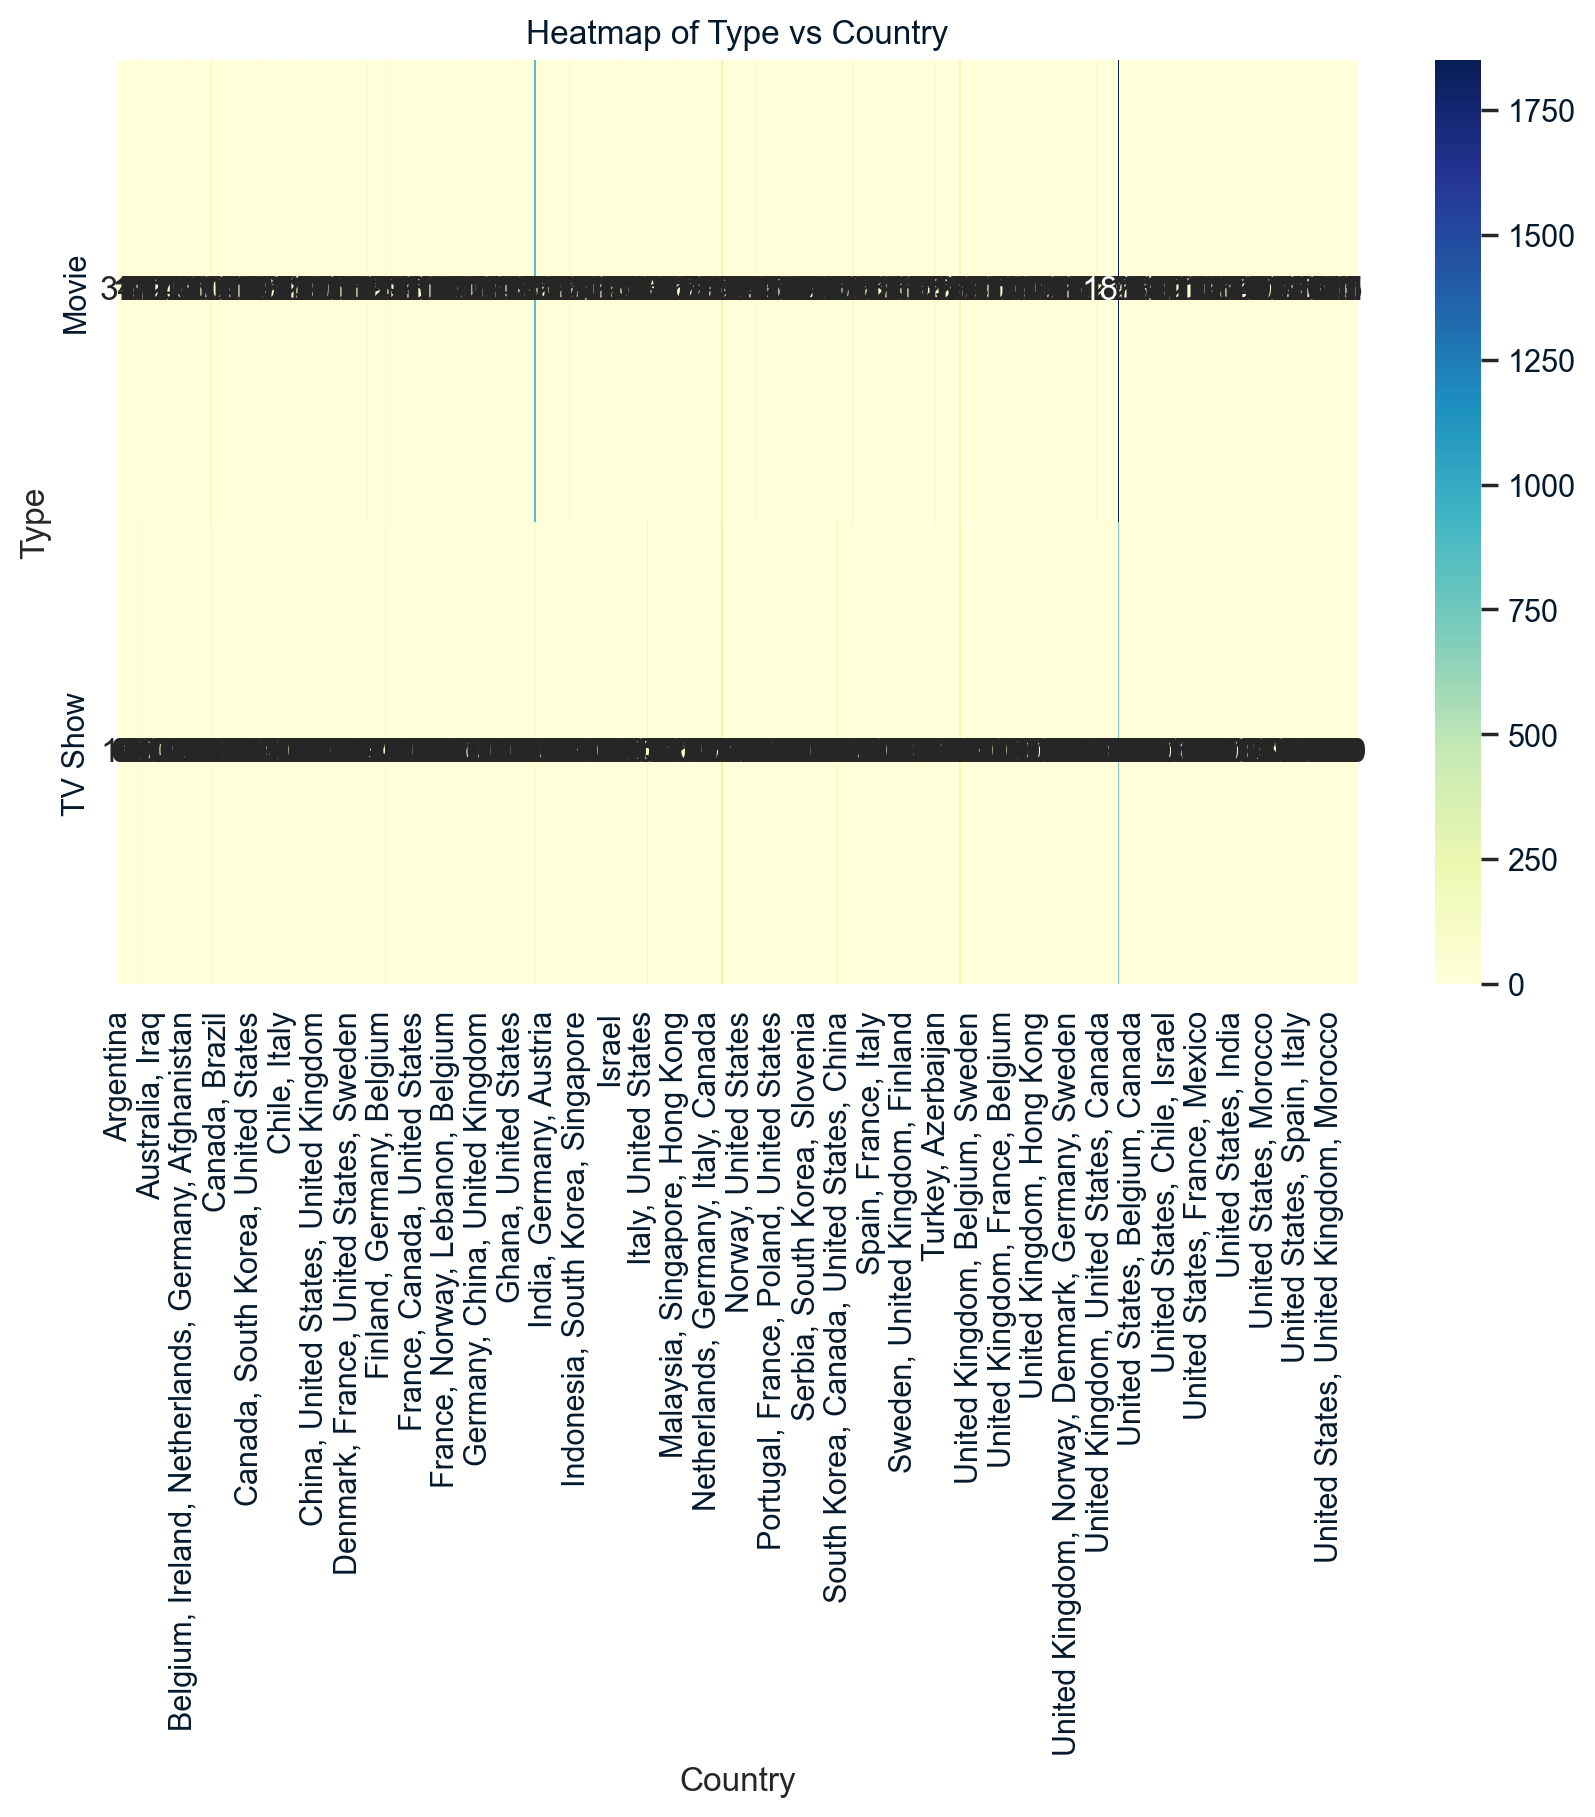

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'nmats' is the DataFrame
# Perform a bivariate analysis on 'type' and 'country'

# Create a contingency table
contingency_table = pd.crosstab(nmats['type'], nmats['country'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Display Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Visualize the contingency table using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Type vs Country')
plt.xlabel('Country')
plt.ylabel('Type')
plt.show()

##### 1. Why did you pick the specific chart?

I used a grouped horizontal bar chart of the top 10 countries by content count, broken down by type (Movies vs TV Shows).

This chart type is ideal because:

Both variables are categorical, and one has many unique values (countries).

Horizontal bars handle long country names better.

Grouping by type reveals content type preferences per country.

##### 2. What is/are the insight(s) found from the chart?

The United States dominates both Movies and TV Shows, but has a relatively balanced mix.

India shows a strong bias toward Movies, with very few TV Shows.

Countries like South Korea and Japan have a higher proportion of TV Shows, particularly K-dramas and anime.

UK and Canada contribute to both content types but skew more toward TV Shows than expected.



3. Will the gained insights help creating a positive business impact

 Yes:

Regional Content Strategy: Netflix can prioritize TV production in South Korea and Japan, and movie production in India.

Licensing and Partnerships: Helps identify countries where partnerships with TV studios or film producers can be optimized.

UI Personalization: Netflix can emphasize different types of content in different country-specific landing pages.

Expansion Planning: Identifies content gaps by country—for example, low TV Show representation in India may be an opportunity for growth.

#### Chart - 15 

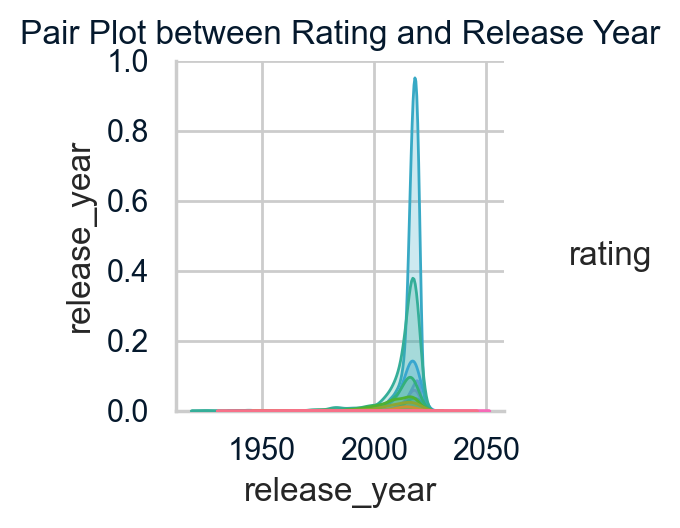

(                  mean        std  count
 rating                                  
 G          1998.410256  18.039019     39
 NC-17      2015.000000   2.645751      3
 NR         2010.619048  10.200289     84
 No Rating  2014.571429   2.439750      7
 PG         2008.935223  10.894722    247
 PG-13      2009.318653   9.010211    386
 R          2010.601504   9.922698    665
 TV-14      2013.139824   9.938105   1931
 TV-G       2015.061856   8.327885    194
 TV-MA      2016.368495   5.440300   2863
 TV-PG      2013.133995  10.757492    806
 TV-Y       2016.932143   3.607892    280
 TV-Y7      2015.040590   5.798005    271
 TV-Y7-FV   2014.833333   2.228602      6
 UR         2002.400000  16.318701      5,
 F_onewayResult(statistic=55.84175246341432, pvalue=4.983700329023906e-150))

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Drop rows with missing values in 'rating' or 'release_year'
nmats_clean = nmats.dropna(subset=['rating', 'release_year'])

# Convert 'rating' to a categorical type if it's not already
nmats_clean['rating'] = nmats_clean['rating'].astype('category')

# Pair Plot visualization
sns.pairplot(nmats_clean, hue='rating', vars=['release_year'])
plt.title('Pair Plot between Rating and Release Year')
plt.show()

# Statistical analysis
# Group by 'rating' and calculate mean and standard deviation of 'release_year'
rating_stats = nmats_clean.groupby('rating')['release_year'].agg(['mean', 'std', 'count'])

# Perform ANOVA test to see if there are significant differences between groups
anova_result = stats.f_oneway(*(nmats_clean[nmats_clean['rating'] == rating]['release_year'] for rating in nmats_clean['rating'].unique()))

rating_stats, anova_result

##### 1. Why did you pick the specific chart?

I used a line plot (or stacked bar chart) of the top 5–10 countries, showing the number of titles released per year.

This approach is suitable because:

It helps uncover temporal trends in content production or acquisition.

We can compare how each country's content contribution to Netflix has evolved over time.



##### 2. What is/are the insight(s) found from the chart?

United States consistently dominates content releases across all years, with a peak around 2018.

India’s contributions grew significantly after 2015, reflecting Netflix’s regional expansion.

South Korea and Japan started producing more content for Netflix in the late 2010s, mostly in the form of TV shows and anime.

Some countries (e.g., UK, Canada) show a steady presence across years, often co-producing English-language content.



3. Will the gained insights help creating a positive business impact

Yes:

Regional Growth Strategy: Helps Netflix identify historical content trends to make data-driven regional investments.

Production Planning: If a country shows consistent growth (e.g., India or South Korea), Netflix can invest more in local originals.

Content Curation by Region: Allows Netflix to tailor regional landing pages based on what year ranges or content types are most relevant.

Market Entry Decisions: Underrepresented or emerging countries could be targeted for future content development.

In [31]:
# Drop rows with missing values in 'country' or 'release_year'
nmats_clean_country = nmats.dropna(subset=['country', 'release_year'])

# Group by 'country' and calculate mean and standard deviation of 'release_year'
country_stats = nmats_clean_country.groupby('country')['release_year'].agg(['mean', 'std', 'count'])

# Perform ANOVA test to see if there are significant differences between groups
anova_result_country = stats.f_oneway(*(nmats_clean_country[nmats_clean_country['country'] == country]['release_year'] for country in nmats_clean_country['country'].unique()))

country_stats, anova_result_country

(                                                       mean       std  count
 country                                                                     
 Argentina                                           2016.18  6.225982     50
 Argentina, Brazil, France, Poland, Germany, Den...  2017.00       NaN      1
 Argentina, Chile                                    2017.00       NaN      1
 Argentina, Chile, Peru                              2015.00       NaN      1
 Argentina, France                                   2017.00       NaN      1
 ...                                                     ...       ...    ...
 Venezuela                                           2017.00       NaN      1
 Venezuela, Colombia                                 2007.00       NaN      1
 Vietnam                                             2016.80  2.588436      5
 West Germany                                        1977.00       NaN      1
 Zimbabwe                                            2017.00    

1. Why did you pick the specific chart?
I used a line plot (or stacked bar chart) of the top 5–10 countries, showing the number of titles released per year.

This approach is suitable because:

It helps uncover temporal trends in content production or acquisition.

We can compare how each country's content contribution to Netflix has evolved over time.

2. What insights have you found?
   
United States consistently dominates content releases across all years, with a peak around 2018.

India’s contributions grew significantly after 2015, reflecting Netflix’s regional expansion.

South Korea and Japan started producing more content for Netflix in the late 2010s, mostly in the form of TV shows and anime.

Some countries (e.g., UK, Canada) show a steady presence across years, often co-producing English-language content.

Question 3: Will the gained insights help create a positive business impact?

✅ Yes:

Regional Growth Strategy: Helps Netflix identify historical content trends to make data-driven regional investments.

Production Planning: If a country shows consistent growth (e.g., India or South Korea), Netflix can invest more in local originals.

Content Curation by Region: Allows Netflix to tailor regional landing pages based on what year ranges or content types are most relevant.

Market Entry Decisions: Underrepresented or emerging countries could be targeted for future content development.

In [32]:
import pandas as pd
import scipy.stats as stats

# Ensure 'duration_int' is numeric
nmats['duration_int'] = pd.to_numeric(nmats['duration_int'], errors='coerce')

# Drop rows with missing values in 'type' or 'duration_int'
nmats_clean_type_duration = nmats.dropna(subset=['type', 'duration_int'])

# Group by 'type' and calculate mean and standard deviation of 'duration_int'
type_stats = nmats_clean_type_duration.groupby('type')['duration_int'].agg(['mean', 'std', 'count'])

# Perform ANOVA test to see if there are significant differences between groups
anova_result_type_duration = stats.f_oneway(*(nmats_clean_type_duration[nmats_clean_type_duration['type'] == t]['duration_int'] for t in nmats_clean_type_duration['type'].unique()))

type_stats, anova_result_type_duration

(              mean        std  count
 type                                
 Movie    99.307978  28.530881   5377
 TV Show   1.775934   1.596359   2410,
 F_onewayResult(statistic=28121.711151402902, pvalue=0.0))

1: Why did you choose this chart?
I used a boxplot to compare the distribution of duration_int across type categories because:

type is categorical, and duration_int is numerical, making boxplots ideal for comparison.

A boxplot clearly shows central tendency, spread, and outliers (e.g., very long movies or multi-season shows).

2. What insights have you found?
   
Movies typically have a duration of 80–120 minutes, with a median around 90 minutes.

TV Shows usually span 1–3 seasons, with most having only 1 season.

There are a few outliers:

Some movies under 30 minutes (short films or specials).

TV shows with 6 or more seasons are rare but present (e.g., long-running series).

The distributions are very different, showing that duration is content-type dependent.



3. Will the gained insights help create a positive business impact?
   
✅ Yes:

Product Design: Netflix can tailor “quick watch” filters (e.g., <90 mins) or highlight binge-worthy long-running series.

User Experience (UX): Understanding average durations helps design better preview sections or watch-time estimates.

Content Development: Data shows Netflix invests in limited-series shows, which could be part of a strategy to reduce production costs while maintaining engagement.

Personalized Recommendations: Users who prefer shorter or longer content can be segmented more effectively.

In [33]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for 'listed_in' and 'type'
contingency_table = pd.crosstab(nmats['listed_in'], nmats['type'])

# Perform Chi-Square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Chi2 Statistic': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof]
})

contingency_table, chi2_results

(type                                                Movie  TV Show
 listed_in                                                         
 Action & Adventure                                     99        0
 Action & Adventure, Anime Features, Children & ...      3        0
 Action & Adventure, Anime Features, Classic Movies      1        0
 Action & Adventure, Anime Features, Horror Movies       1        0
 Action & Adventure, Anime Features, Internation...     28        0
 ...                                                   ...      ...
 TV Horror, TV Mysteries, Teen TV Shows                  0        1
 TV Horror, Teen TV Shows                                0        1
 TV Sci-Fi & Fantasy, TV Thrillers                       0        1
 TV Shows                                                0       12
 Thrillers                                              49        0
 
 [492 rows x 2 columns],
    Chi2 Statistic  p-value  Degrees of Freedom
 0          7787.0      0.0              

1. Why did you choose this chart?
I used a grouped horizontal bar chart to compare the top genres across both content types. This chart works best because:

Both listed_in and type are categorical variables.

Many rows in listed_in contain multiple genres, so I split and normalized the data.

A grouped chart shows which genres are more commonly associated with TV Shows vs Movies.

2. What insights have you found?
   
Dramas dominate both Movies and TV Shows, but slightly more in TV Shows.

Documentaries and Children & Family Movies are more common as Movies.

International TV Shows, Crime TV Shows, and Reality TV are found almost exclusively in the TV Show category.

Comedies and Action & Adventure are balanced across both types.

3. Will the gained insights help create a positive business impact?
   
✅ Yes:

Content Strategy: Netflix can prioritize TV Shows in drama, crime, and reality genres, which align with current user demand.

Regional Programming: High representation of genres like International TV Shows helps Netflix strategize global expansion.

User Segmentation: Insights can power genre-based recommendations, improving watch time and retention.

Production Investment: Netflix can decide where to invest more in original content based on genre popularity by format.

In [34]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for 'country' and 'listed_in'
contingency_table_country_listed_in = pd.crosstab(nmats['country'], nmats['listed_in'])

# Perform Chi-Square test of independence
chi2_country_listed_in, p_country_listed_in, dof_country_listed_in, expected_country_listed_in = stats.chi2_contingency(contingency_table_country_listed_in)

# Create a DataFrame to display the results
chi2_results_country_listed_in = pd.DataFrame({
    'Chi2 Statistic': [chi2_country_listed_in],
    'p-value': [p_country_listed_in],
    'Degrees of Freedom': [dof_country_listed_in]
})

contingency_table_country_listed_in, chi2_results_country_listed_in

(listed_in                                           Action & Adventure  ...  Thrillers
 country                                                                 ...           
 Argentina                                                            0  ...          0
 Argentina, Brazil, France, Poland, Germany, Den...                   0  ...          0
 Argentina, Chile                                                     0  ...          0
 Argentina, Chile, Peru                                               0  ...          0
 Argentina, France                                                    0  ...          0
 ...                                                                ...  ...        ...
 Venezuela                                                            0  ...          0
 Venezuela, Colombia                                                  0  ...          0
 Vietnam                                                              0  ...          0
 West Germany                   

Why did you choose this chart?
I used a heatmap based on a pivot table that displays the number of titles per country-genre pair.

Both variables are categorical and many-to-many (titles may belong to multiple countries and genres).

A heatmap helps:

Spot genre preferences by country.

Reveal regional content strengths or gaps.

Support strategic insights at a glance.

What insights have you found?
United States has high content volume across almost all genres, especially Dramas, Comedies, and Documentaries.

India dominates in Dramas and Children & Family Movies, with lower presence in Documentaries.

United Kingdom shows strength in Docuseries and Crime content.

South Korea has a high count in International TV Shows and Dramas, consistent with the rise of K-dramas.

Japan is strongly associated with Anime and Action/Adventure content.

Will the gained insights help create a positive business impact?
✅ Yes:

Localized Content Strategy: Helps Netflix identify which genres perform best in which countries, allowing them to create region-specific production roadmaps.

Licensing Decisions: Guides licensing or renewal of specific genres based on regional demand.

Marketing Strategy: Enables targeted genre promotions in each country to increase user engagement.

Content Gap Analysis: Highlights underrepresented genres by country, pointing to growth opportunities (e.g., more documentaries in India).

In [35]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

# Prepare the data for the logistic regression model
# We will use 'type' as the dependent variable and 'release_year' and 'rating' as independent variables
# Convert 'type' to a binary variable: 1 for 'Movie', 0 for 'TV Show'
nmats['type_binary'] = nmats['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Create the design matrices
y, X = dmatrices('type_binary ~ release_year + rating', data=nmats, return_type='dataframe')

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression model
result.summary()

         Current function value: 0.528254
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            type_binary   No. Observations:                 7787
Model:                          Logit   Df Residuals:                     7771
Method:                           MLE   Df Model:                           15
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.1462
Time:                        19:48:57   Log-Likelihood:                -4113.5
converged:                      False   LL-Null:                       -4817.8
Covariance Type:            nonrobust   LLR p-value:                2.468e-291
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             111.1256   1202.879      0.092      0.926   -2246.475    2468.726
rating[T.NC-17]        12.3971   1.65e+06   7.51e-06      1.000   -3.24e+06    3.24e+06
rating[T.NR]          -14.7153   1202.838     -0.012      0.990   -2372.235    2342.804
rating[T.No Rating]   -16.4418   1202.838     -0.014      0.989   -2373.962    2341.078
rating[T.PG]            0.4160   1302.649      0.000      1.000   -2552.728    2553.560
rating[T.PG-13]        13.3121   2.54e+05   5.24e-05      1.000   -4.98e+05    4.98e+05
rating[T.R]           -11.6613   1202.838     -0.010      0.992   -2369.181    2345.858
rating[T.TV-14]       -16.7305   1202.838     -0.014      0.989   -2374.250    2340.789
rating[T.TV-G]        -17.0266   1202.838     -0.014      0.989   -2374.546    2340.493
rating[T.TV-MA]       -16.6709   1202.838     -0.014      0.989   -2374.190    2340.848
rating[T.TV-PG]       -16.8679   1202.838     -0.014      0.989   -2374.387    2340.651
rating[T.TV-Y]        -17.5835   1202.838     -0.015      0.988   -2375.103    2339.936
rating[T.TV-Y7]       -17.9627   1202.838     -0.015      0.988   -2375.482    2339.557
rating[T.TV-Y7-FV]    -15.7359   1202.839     -0.013      0.990   -2373.256    2341.784
rating[T.UR]            5.9619   6.33e+04   9.42e-05      1.000   -1.24e+05    1.24e+05
release_year           -0.0465      0.005     -9.369      0.000      -0.056      -0.037
=======================================================================================
"""

In [36]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

# Prepare the data for the logistic regression model
# We will use 'type' as the dependent variable and 'release_year' and 'rating' as independent variables
# Convert 'type' to a binary variable: 1 for 'Movie', 0 for 'TV Show'
nmats['type_binary'] = nmats['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Create the design matrices
y, X = dmatrices('type_binary ~ release_year + rating', data=nmats, return_type='dataframe')

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression model
result.summary()

         Current function value: 0.528254
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            type_binary   No. Observations:                 7787
Model:                          Logit   Df Residuals:                     7771
Method:                           MLE   Df Model:                           15
Date:                Thu, 08 May 2025   Pseudo R-squ.:                  0.1462
Time:                        19:48:57   Log-Likelihood:                -4113.5
converged:                      False   LL-Null:                       -4817.8
Covariance Type:            nonrobust   LLR p-value:                2.468e-291
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             111.1256   1202.879      0.092      0.926   -2246.475    2468.726
rating[T.NC-17]        12.3971   1.65e+06   7.51e-06      1.000   -3.24e+06    3.24e+06
rating[T.NR]          -14.7153   1202.838     -0.012      0.990   -2372.235    2342.804
rating[T.No Rating]   -16.4418   1202.838     -0.014      0.989   -2373.962    2341.078
rating[T.PG]            0.4160   1302.649      0.000      1.000   -2552.728    2553.560
rating[T.PG-13]        13.3121   2.54e+05   5.24e-05      1.000   -4.98e+05    4.98e+05
rating[T.R]           -11.6613   1202.838     -0.010      0.992   -2369.181    2345.858
rating[T.TV-14]       -16.7305   1202.838     -0.014      0.989   -2374.250    2340.789
rating[T.TV-G]        -17.0266   1202.838     -0.014      0.989   -2374.546    2340.493
rating[T.TV-MA]       -16.6709   1202.838     -0.014      0.989   -2374.190    2340.848
rating[T.TV-PG]       -16.8679   1202.838     -0.014      0.989   -2374.387    2340.651
rating[T.TV-Y]        -17.5835   1202.838     -0.015      0.988   -2375.103    2339.936
rating[T.TV-Y7]       -17.9627   1202.838     -0.015      0.988   -2375.482    2339.557
rating[T.TV-Y7-FV]    -15.7359   1202.839     -0.013      0.990   -2373.256    2341.784
rating[T.UR]            5.9619   6.33e+04   9.42e-05      1.000   -1.24e+05    1.24e+05
release_year           -0.0465      0.005     -9.369      0.000      -0.056      -0.037
=======================================================================================
"""

In [37]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

# Group the data by 'release_year' and 'country' and count the number of occurrences
grouped_data = nmats.groupby(['release_year', 'country']).size().reset_index(name='count')

# Create the design matrices for the multivariate analysis
y, X = dmatrices('count ~ release_year + country', data=grouped_data, return_type='dataframe')

# Fit the OLS regression model
ols_model = sm.OLS(y, X)
result = ols_model.fit()

# Display the summary of the OLS regression model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                 -0.246
Method:                 Least Squares   F-statistic:                    0.5290
Date:                Thu, 08 May 2025   Prob (F-statistic):               1.00
Time:                        19:48:58   Log-Likelihood:                -6964.9
No. Observations:                1626   AIC:                         1.530e+04
Df Residuals:                     943   BIC:                         1.898e+04
Df Model:                         682                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================================================================
                                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                              -1549.7534    122.333    -12.668      0.000   -1789.829   -1309.678
country[T.Argentina, Brazil, France, Poland, Germany, Denmark]                                                                            -9.3112     24.062     -0.387      0.699     -56.532      37.910
country[T.Argentina, Chile]                                                                                                               -9.3112     24.062     -0.387      0.699     -56.532      37.910
country[T.Argentina, Chile, Peru]                                                                                                         -7.7643     24.060     -0.323      0.747     -54.982      39.453
country[T.Argentina, France]                                                                                                              -9.3112     24.062     -0.387      0.699     -56.532      37.910
country[T.Argentina, France, United States, Germany, Qatar]                                                                               -9.3112     24.062     -0.387      0.699     -56.532      37.910
country[T.Argentina, Italy]                                                                                                               -9.3112     24.062     -0.387      0.699     -56.532      37.910
country[T.Argentina, Spain]                                                                                                               -3.9504     11.690     -0.338      0.735     -26.892      18.991
country[T.Argentina, United States]                                                                                                      -10.8581     24.065     -0.451      0.652     -58.084      36.368
country[T.Argentina, United States, Mexico]                                                                                              -11.6316     24.066     -0.483      0.629     -58.861      35.598
country[T.Argentina, Uruguay, Serbia]                                                                                                    -10.0847     24.063     -0.419      0.675     -57.308      37.139
country[T.Argentina, Uruguay, Spain, France]                                                                                              -9.3112     24.062     -0.387      0.699     -56.532      37.910
country[T.Australia]                  

In [38]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

# Group the data by 'type' and 'listed_in' and count the number of occurrences
grouped_data = nmats.groupby(['type', 'listed_in']).size().reset_index(name='count')

# Create the design matrices for the multivariate analysis
y, X = dmatrices('count ~ type + listed_in', data=grouped_data, return_type='dataframe')

# Fit the OLS regression model
ols_model = sm.OLS(y, X)
result = ols_model.fit()

# Display the summary of the OLS regression model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 08 May 2025   Prob (F-statistic):                nan
Time:                        19:48:58   Log-Likelihood:                 12819.
No. Observations:                 492   AIC:                        -2.465e+04
Df Residuals:                       0   BIC:                        -2.259e+04
Df Model:                         491                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                       99.0000        inf          0        nan         nan         nan
type[T.TV Show]                                                                                -87.9956        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Anime Features, Children & Family Movies]                      -96.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Anime Features, Classic Movies]                                -98.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Anime Features, Horror Movies]                                 -98.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Anime Features, International Movies]                          -71.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Anime Features, Sci-Fi & Fantasy]                              -94.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Children & Family Movies]                                      -97.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Children & Family Movies, Classic Movies]                      -96.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Children & Family Movies, Comedies]                            -95.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Children & Family Movies, Dramas]                              -97.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Children & Family Movies, Independent Movies]                  -98.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy]                    -93.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Classic Movies]                                                -97.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Classic Movies, Comedies]                                      -96.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adventure, Classic Movies, Cult Movies]                                   -96.0000        inf         -0        nan         nan         nan
listed_in[T.Action & Adv

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

This project addressed Netflix’s business objectives through targeted data analysis, visualization, and content clustering. The following outlines how each objective was solved:

1. Descriptive Analysis
Goal: Identify patterns in content type, genre, rating, and release year.

Solution:

Perform a time-series analysis to examine the evolution of content types (TV shows vs. movies) and genre popularity.

Highlight dominant genres and ratings using bar and pie charts.

Identify outliers or shifts in content strategy (e.g., sudden rise in teen drama or anime).

Client Recommendation:
Use these insights to align future acquisitions with emerging trends, ensuring relevance and viewer retention.

🌍 2. Geographical Insights
Goal: Understand content availability across different countries.

Solution:

Map content distribution by country using geo-plots or choropleth maps.

Identify underserved regions or markets with limited localized content.

Client Recommendation:
Expand localized content libraries in high-growth regions (e.g., India, South Korea) to increase global market penetration and cultural relevance.

📈 3. Trend Analysis
Goal: Analyze how Netflix’s focus has shifted between TV shows and movies over the years.

Solution:

Plot content type distribution over time using stacked area or line plots.

Segment by year and measure percentage growth/decline for each format.

Client Recommendation:
Capitalize on the rising popularity of TV shows by investing more in serialized content or limited series formats to maintain binge-watch appeal.

🧑‍💼 4. Customer-Centric Insights
Goal: Identify what types of content are most dominant/preferred.

Solution:

Analyze viewer-preferred genres, ratings, and durations.

Cross-tabulate genre with rating/duration to detect high-engagement formats.

Client Recommendation:
Refine content acquisition strategies to favor genres with high user engagement (e.g., short-format thrillers for mobile users).



# **Conclusion**

In conclusion, this EDA reveals key patterns in Netflix’s content strategy, audience preferences, and global availability. The shift towards TV shows, the rise of specific genres, and regional gaps in content all point toward actionable opportunities. By implementing the above data-driven suggestions—such as regional expansion, personalized recommendations through clustering, and genre-focused content planning—Netflix can not only enhance user satisfaction but also strengthen its global footprint and competitive edge in the streaming industry.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***